In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install catboost lightgbm xgboost
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [168]:
"""
SalePrice - mülkün dolar cinsinden satış fiyatı. Bu, tahmin etmeye çalışılan hedef değişkendir.
MSSubClass: İnşaat sınıfı
MSZoning: Genel imar sınıflandırması
LotFrontage: Mülkiyetin cadde ile doğrudan bağlantısının olup olmaması
LotArea: Parsel büyüklüğü
Street: Yol erişiminin tipi
Alley: Sokak girişi tipi
LotShape: Mülkün genel şekli
LandContour: Mülkün düzlüğü
Utulities: Mevcut hizmetlerin türü
LotConfig: Parsel yapılandırması
LandSlope: Mülkün eğimi
Neighborhood: Ames şehir sınırları içindeki fiziksel konumu
Condition1: Ana yol veya tren yoluna yakınlık
Condition2: Ana yola veya demiryoluna yakınlık (eğer ikinci bir yer varsa)
BldgType: Konut tipi
HouseStyle: Konut sitili
OverallQual: Genel malzeme ve bitiş kalitesi
OverallCond: Genel durum değerlendirmesi
YearBuilt: Orijinal yapım tarihi
YearRemodAdd: Yeniden düzenleme tarihi
RoofStyle: Çatı tipi
RoofMatl: Çatı malzemesi
Exterior1st: Evdeki dış kaplama
Exterior2nd: Evdeki dış kaplama (birden fazla malzeme varsa)
MasVnrType: Duvar kaplama türü
MasVnrArea: Kare ayaklı duvar kaplama alanı
ExterQual: Dış malzeme kalitesi
ExterCond: Malzemenin dışta mevcut durumu
Foundation: Vakıf tipi
BsmtQual: Bodrumun yüksekliği
BsmtCond: Bodrum katının genel durumu
BsmtExposure: Yürüyüş veya bahçe katı bodrum duvarları
BsmtFinType1: Bodrum bitmiş alanının kalitesi
BsmtFinSF1: Tip 1 bitmiş alanın metre karesi
BsmtFinType2: İkinci bitmiş alanın kalitesi (varsa)
BsmtFinSF2: Tip 2 bitmiş alanın metre karesi
BsmtUnfSF: Bodrumun bitmemiş alanın metre karesi
TotalBsmtSF: Bodrum alanının toplam metre karesi
Heating: Isıtma tipi
HeatingQC: Isıtma kalitesi ve durumu
CentralAir: Merkezi klima
Electrical: elektrik sistemi
1stFlrSF: Birinci Kat metre kare alanı
2ndFlrSF: İkinci kat metre kare alanı
LowQualFinSF: Düşük kaliteli bitmiş alanlar (tüm katlar)
GrLivArea: Üstü (zemin) oturma alanı metre karesi
BsmtFullBath: Bodrum katındaki tam banyolar
BsmtHalfBath: Bodrum katındaki yarım banyolar
FullBath: Üst katlardaki tam banyolar
HalfBath: Üst katlardaki yarım banyolar
BedroomAbvGr: Bodrum seviyesinin üstünde yatak odası sayısı
KitchenAbvGr: Bodrum seviyesinin üstünde mutfak Sayısı
KitchenQual: Mutfak kalitesi
TotRmsAbvGrd: Üst katlardaki toplam oda (banyo içermez)
Functional: Ev işlevselliği değerlendirmesi
Fireplaces: Şömineler
FireplaceQu: Şömine kalitesi
Garage Türü: Garaj yeri
GarageYrBlt: Garajın yapım yılı
GarageFinish: Garajın iç yüzeyi
GarageCars: Araç kapasitesi
GarageArea: Garajın alanı
GarageQual: Garaj kalitesi
GarageCond: Garaj durumu
PavedDrive: Garajla yol arasındaki yol
WoodDeckSF: Ayaklı ahşap güverte alanı
OpenPorchSF: Kapı önündeki açık veranda alanı
EnclosedPorch: Kapı önündeki kapalı veranda alan
3SsPorch: Üç mevsim veranda alanı
ScreenPorch: Veranda örtü alanı
PoolArea: Havuzun metre kare alanı
PoolQC: Havuz kalitesi
Fence: Çit kalitesi
MoSold: Satıldığı ay
YrSold: Satıldığı yıl
SaleType: Satış Türü
"""

'\nSalePrice - mülkün dolar cinsinden satış fiyatı. Bu, tahmin etmeye çalışılan hedef değişkendir.\nMSSubClass: İnşaat sınıfı\nMSZoning: Genel imar sınıflandırması\nLotFrontage: Mülkiyetin cadde ile doğrudan bağlantısının olup olmaması\nLotArea: Parsel büyüklüğü\nStreet: Yol erişiminin tipi\nAlley: Sokak girişi tipi\nLotShape: Mülkün genel şekli\nLandContour: Mülkün düzlüğü\nUtulities: Mevcut hizmetlerin türü\nLotConfig: Parsel yapılandırması\nLandSlope: Mülkün eğimi\nNeighborhood: Ames şehir sınırları içindeki fiziksel konumu\nCondition1: Ana yol veya tren yoluna yakınlık\nCondition2: Ana yola veya demiryoluna yakınlık (eğer ikinci bir yer varsa)\nBldgType: Konut tipi\nHouseStyle: Konut sitili\nOverallQual: Genel malzeme ve bitiş kalitesi\nOverallCond: Genel durum değerlendirmesi\nYearBuilt: Orijinal yapım tarihi\nYearRemodAdd: Yeniden düzenleme tarihi\nRoofStyle: Çatı tipi\nRoofMatl: Çatı malzemesi\nExterior1st: Evdeki dış kaplama\nExterior2nd: Evdeki dış kaplama (birden fazla malzem

In [169]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [170]:
# train ve test verilerini birleşirelim
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/train.csv")
df = pd.concat([train, test], axis=0, ignore_index=True)

In [171]:
def check_df(dataframe, head=5):
  print("##################### Shape ##################### ")
  print(dataframe.shape)
  print("##################### Types ##################### ")
  print(dataframe.dtypes)
  print("##################### Head ##################### ")
  print(dataframe.head(head))
  print("##################### Tail ##################### ")
  print(dataframe.tail(head))
  print("##################### NA ##################### ")
  print(dataframe.isnull().sum())
  print("###################### Quanties ###################### ")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [172]:
check_df(df)

##################### Shape ##################### 
(2920, 81)
##################### Types ##################### 
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2

In [173]:
# Numerik ve Kategorik Değişkenlerin Yakalanması

In [174]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                 dataframe[col].dtypes != "O"]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                 dataframe[col].dtypes == "O"]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
  num_cols = [col for col in num_cols if col not in num_but_cat]

  print(f"observations: {dataframe.shape[0]}")
  print(f"variables: {dataframe.shape[1]}")
  print(f"cat_cols: {len(cat_cols)}")
  print(f"num_cols: {len(num_cols)}")
  print(f"cat_but_car: {len(cat_but_car)}")
  print(f"num_but_cat: {len(num_but_cat)}")
  return cat_cols, num_cols, cat_but_car

In [175]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

observations: 2920
variables: 81
cat_cols: 53
num_cols: 27
cat_but_car: 1
num_but_cat: 11


In [176]:
# Kategorik Değişken Analizi

In [177]:
def cat_summary(dataframe, col_name, plot=False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("##########################################")
  if plot:
    sns.countplot(x=dataframe[col_name], data=dataframe)
    plt.show(block=True)

In [178]:
for col in cat_cols:
  cat_summary(df, col)

          MSZoning  Ratio
MSZoning                 
RL            2302 78.836
RM             436 14.932
FV             130  4.452
RH              32  1.096
C (all)         20  0.685
##########################################
        Street  Ratio
Street               
Pave      2908 99.589
Grvl        12  0.411
##########################################
       Alley  Ratio
Alley              
Grvl     100  3.425
Pave      82  2.808
##########################################
          LotShape  Ratio
LotShape                 
Reg           1850 63.356
IR1            968 33.151
IR2             82  2.808
IR3             20  0.685
##########################################
             LandContour  Ratio
LandContour                    
Lvl                 2622 89.795
Bnk                  126  4.315
HLS                  100  3.425
Low                   72  2.466
##########################################
           Utilities  Ratio
Utilities                  
AllPub          2918 99.932
NoS

In [179]:
# Sayısal Değişen Analizi

In [180]:
def num_summary(dataframe, numerical_col, plot=False):
  quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[numerical_col].describe(quantiles).T)


  if plot:
    dataframe[numerical_col].hist(bins=20)
    plt.xlabel(numerical_col)
    plt.title(numerical_col)
    plt.show()

count   2920.000
mean     730.500
std      421.538
min        1.000
5%        73.950
10%      146.900
20%      292.800
30%      438.700
40%      584.600
50%      730.500
60%      876.400
70%     1022.300
80%     1168.200
90%     1314.100
95%     1387.050
99%     1445.810
max     1460.000
Name: Id, dtype: float64


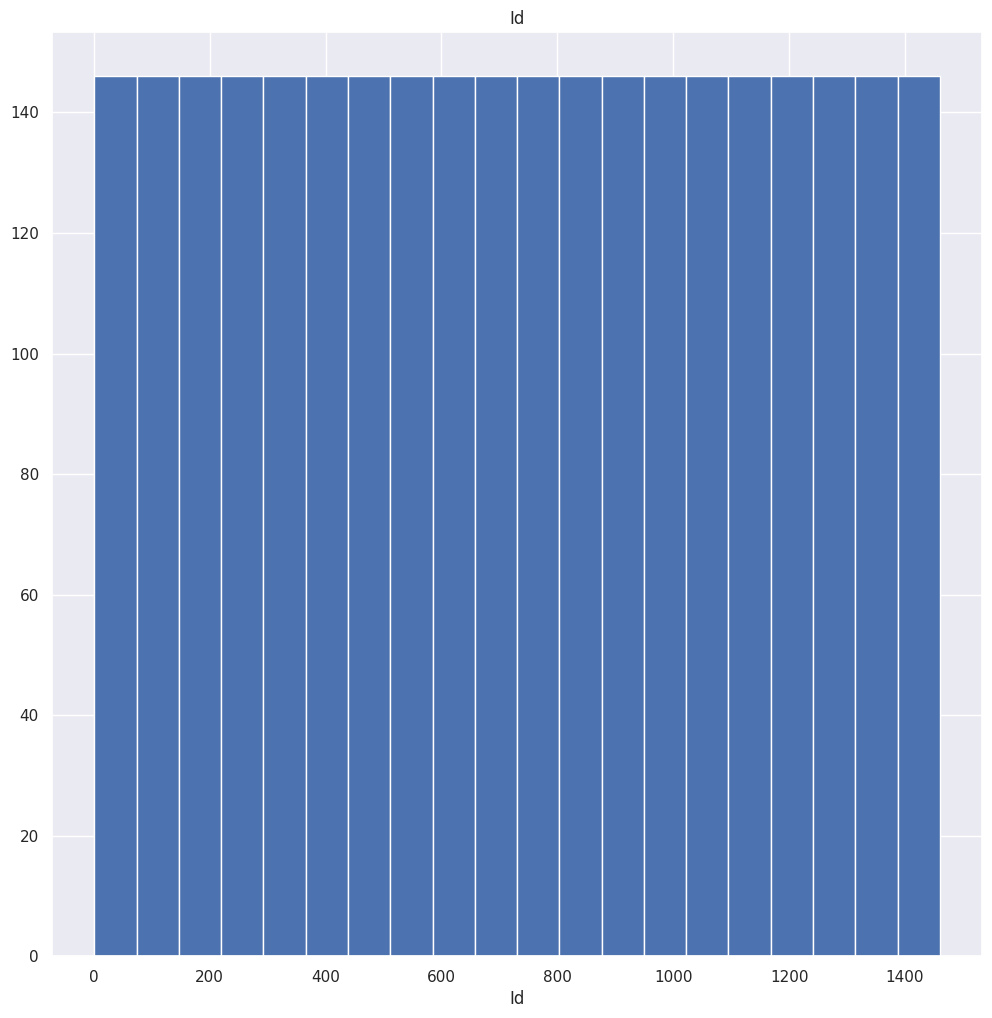

count   2920.000
mean      56.897
std       42.293
min       20.000
5%        20.000
10%       20.000
20%       20.000
30%       20.000
40%       30.000
50%       50.000
60%       60.000
70%       60.000
80%       80.000
90%      120.000
95%      160.000
99%      190.000
max      190.000
Name: MSSubClass, dtype: float64


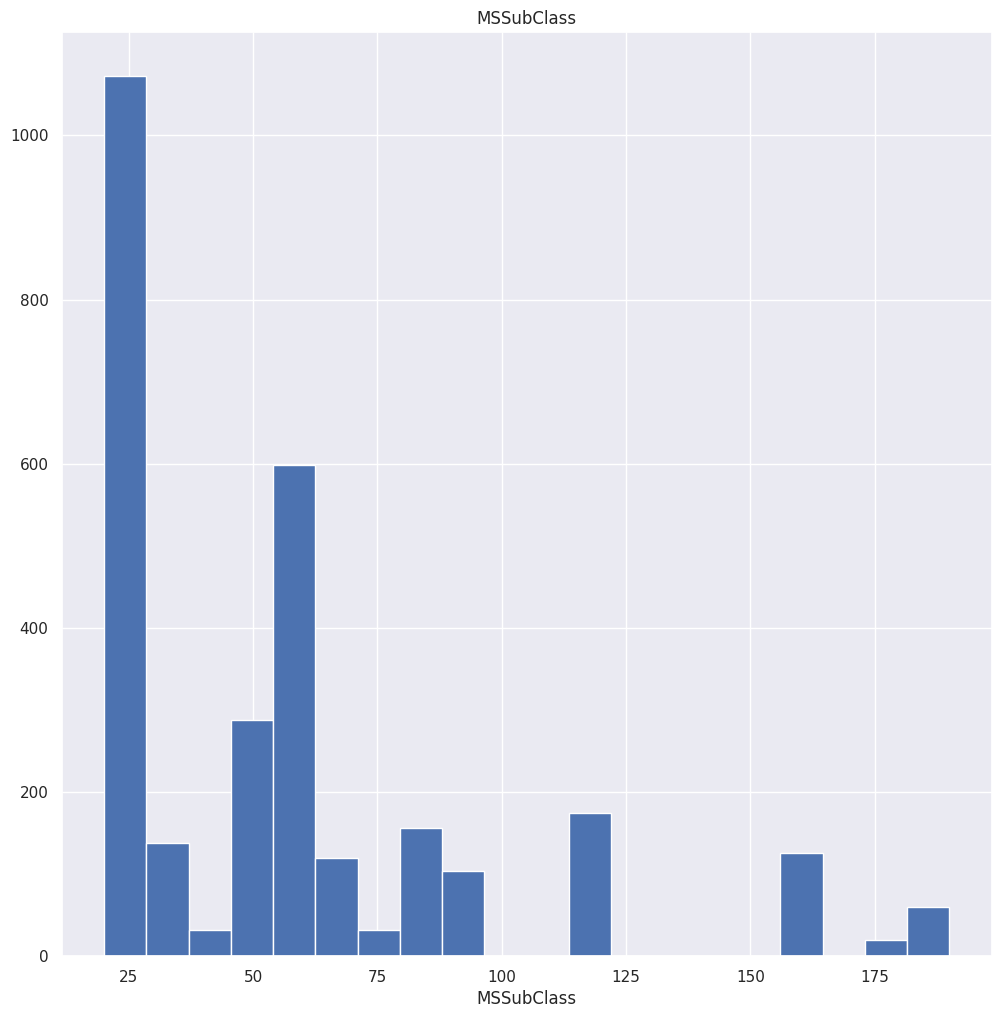

count   2402.000
mean      70.050
std       24.280
min       21.000
5%        34.000
10%       44.000
20%       53.000
30%       60.000
40%       63.000
50%       69.000
60%       74.000
70%       79.000
80%       85.000
90%       96.000
95%      107.000
99%      141.000
max      313.000
Name: LotFrontage, dtype: float64


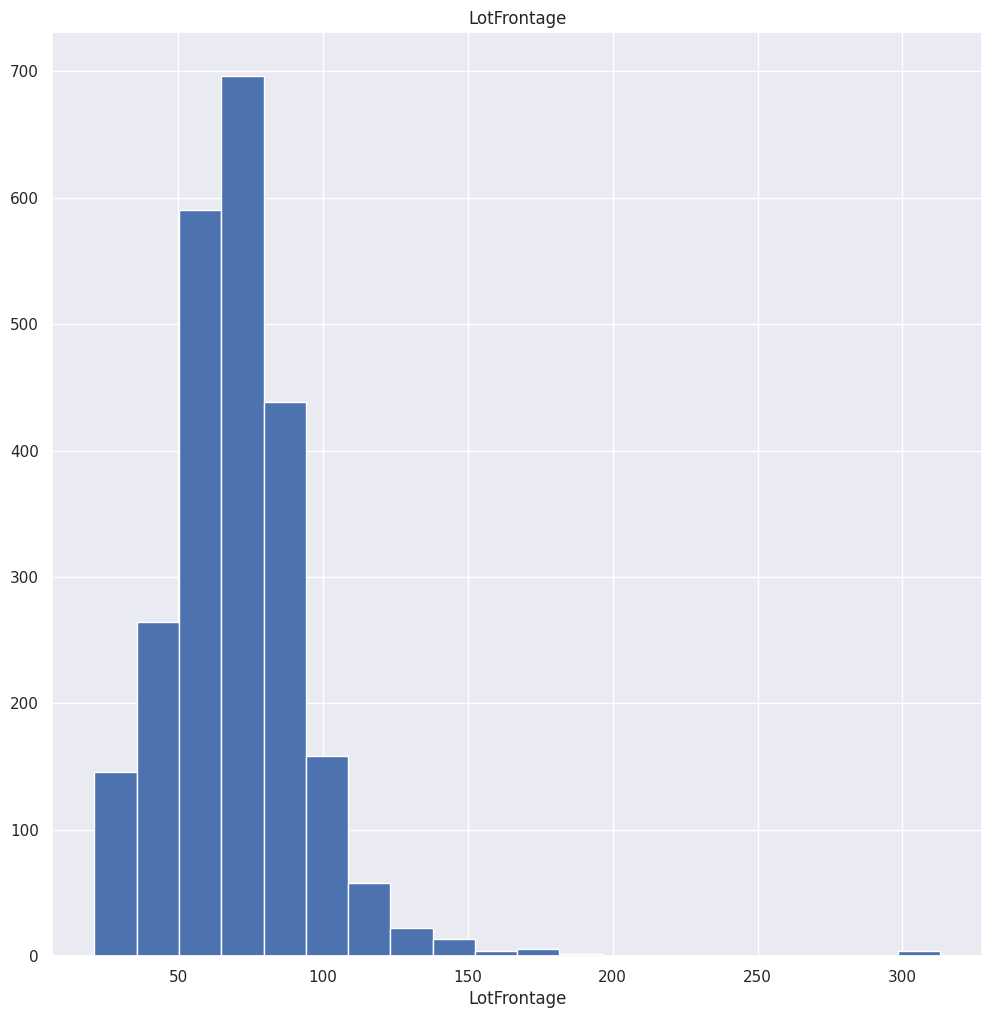

count     2920.000
mean     10516.828
std       9979.555
min       1300.000
5%        3311.700
10%       5000.000
20%       7078.400
30%       8063.700
40%       8793.400
50%       9478.500
60%      10198.200
70%      11066.500
80%      12205.800
90%      14381.700
95%      17401.150
99%      38609.240
max     215245.000
Name: LotArea, dtype: float64


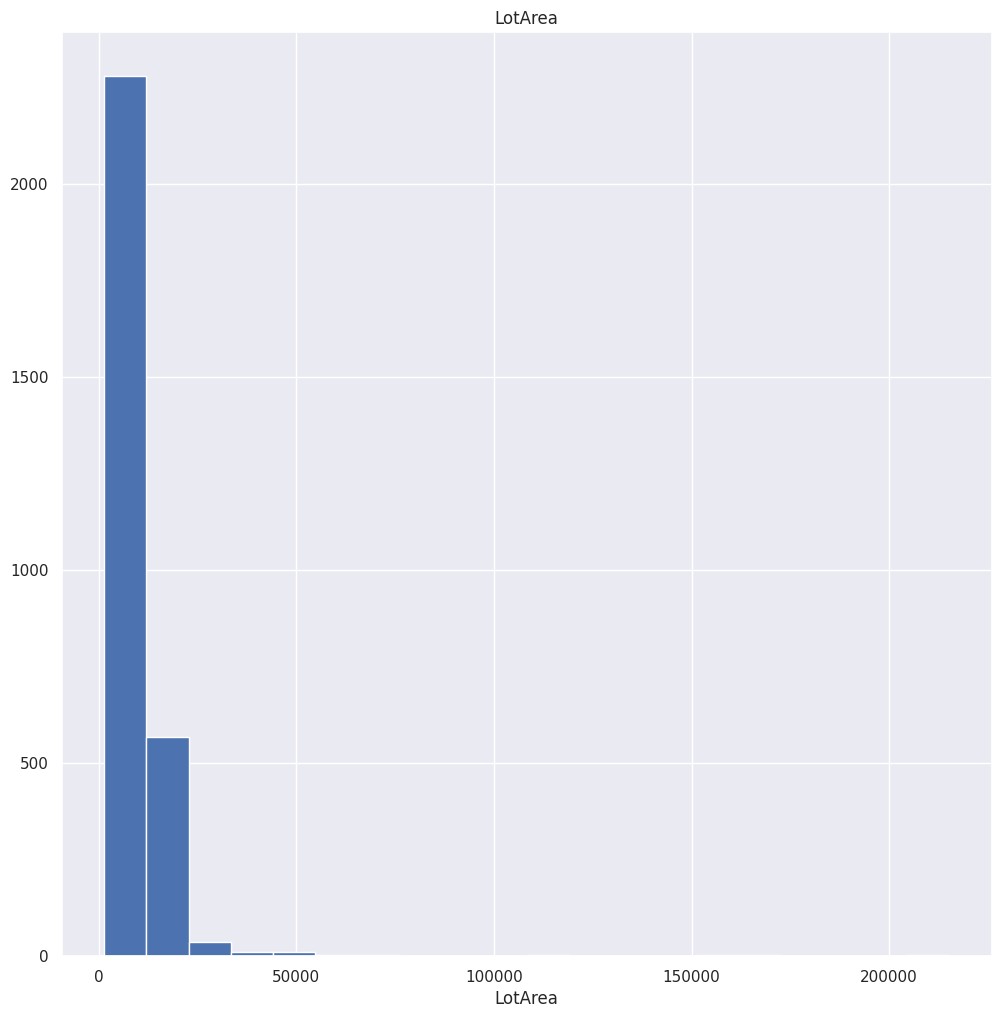

count   2920.000
mean       6.099
std        1.383
min        1.000
5%         4.000
10%        5.000
20%        5.000
30%        5.000
40%        6.000
50%        6.000
60%        6.000
70%        7.000
80%        7.000
90%        8.000
95%        8.000
99%       10.000
max       10.000
Name: OverallQual, dtype: float64


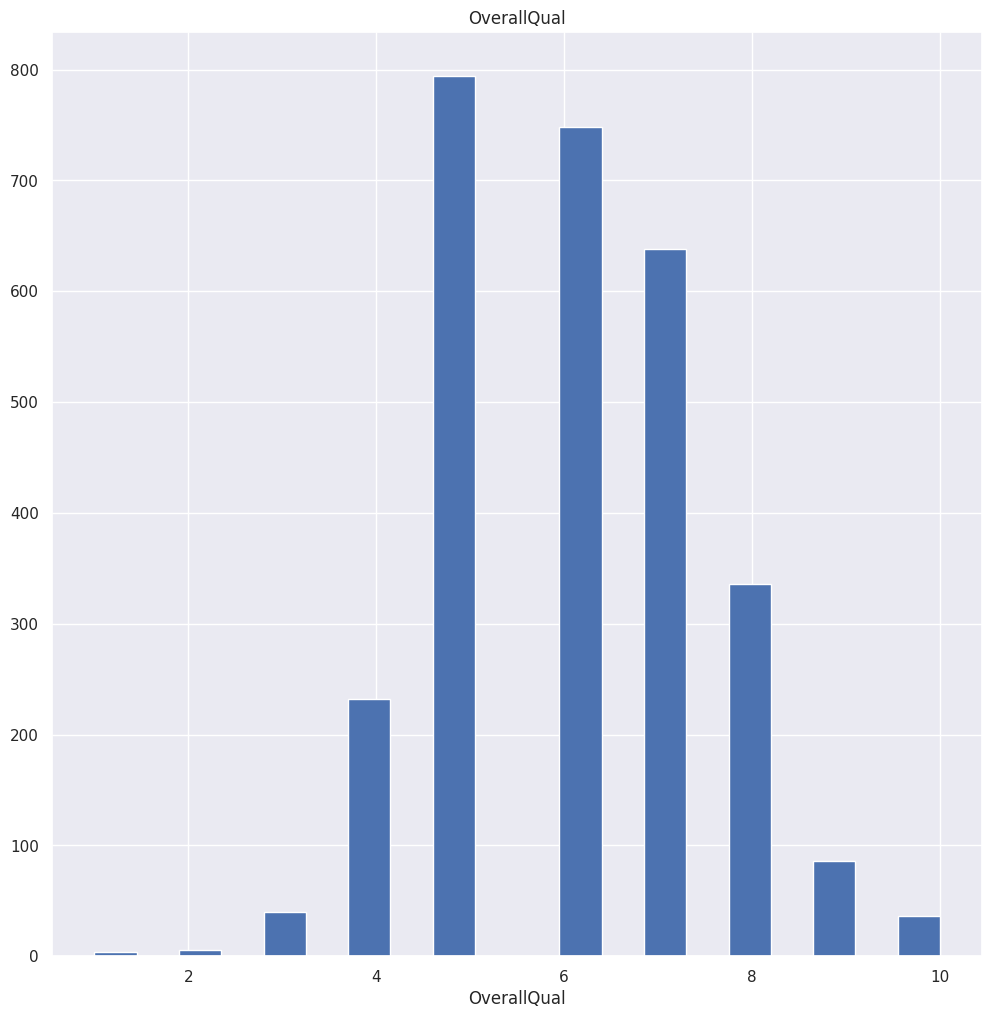

count   2920.000
mean    1971.268
std       30.198
min     1872.000
5%      1916.000
10%     1924.900
20%     1947.800
30%     1958.000
40%     1965.000
50%     1973.000
60%     1984.000
70%     1997.300
80%     2003.000
90%     2006.000
95%     2007.000
99%     2009.000
max     2010.000
Name: YearBuilt, dtype: float64


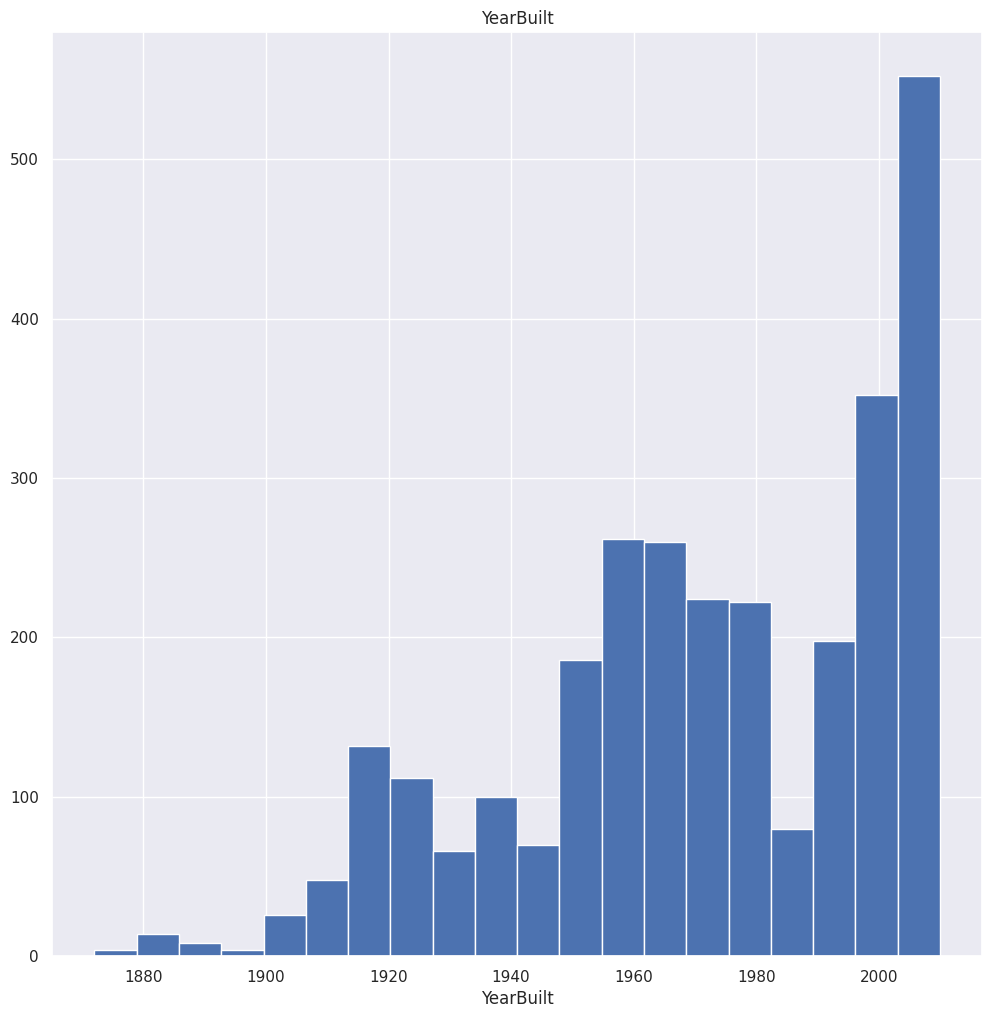

count   2920.000
mean    1984.866
std       20.642
min     1950.000
5%      1950.000
10%     1950.000
20%     1961.800
30%     1971.000
40%     1980.000
50%     1994.000
60%     1998.000
70%     2002.000
80%     2005.000
90%     2006.000
95%     2007.000
99%     2009.000
max     2010.000
Name: YearRemodAdd, dtype: float64


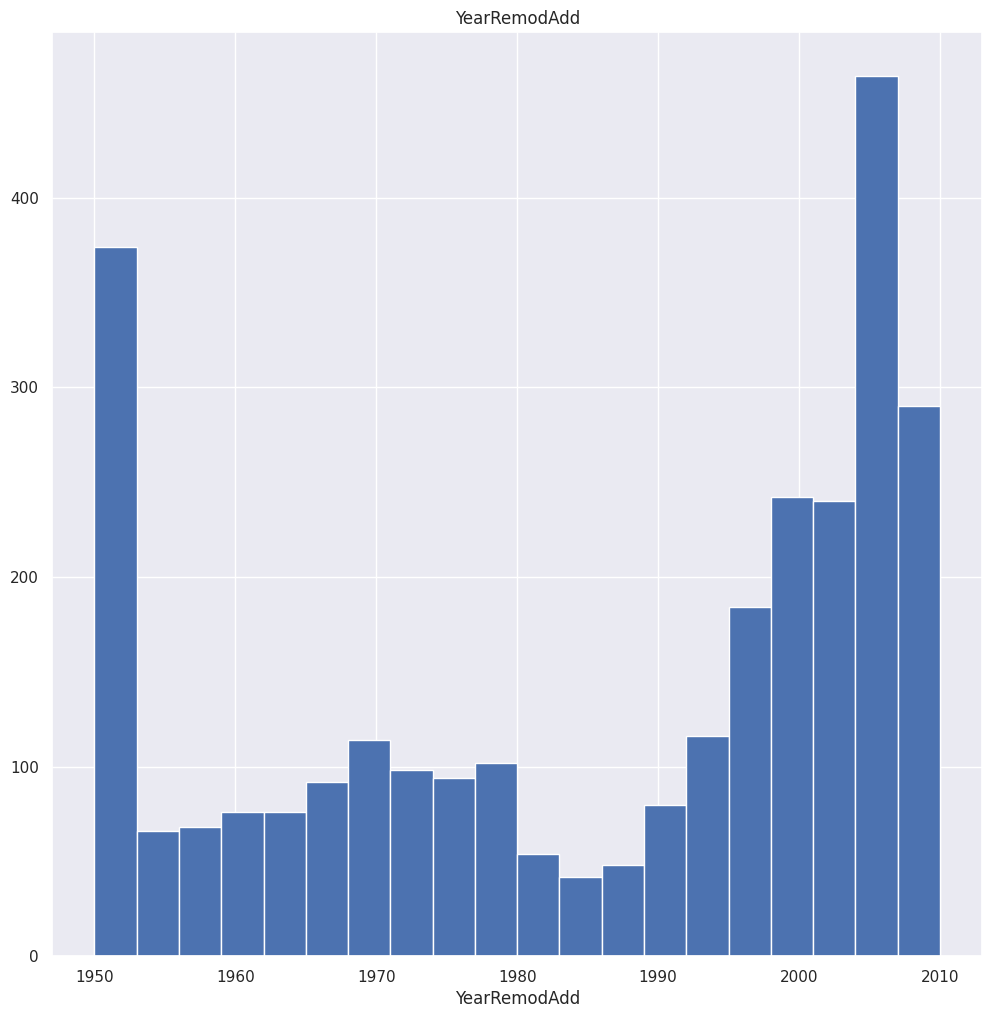

count   2904.000
mean     103.685
std      181.035
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%       16.000
70%      117.000
80%      206.000
90%      335.000
95%      456.000
99%      795.760
max     1600.000
Name: MasVnrArea, dtype: float64


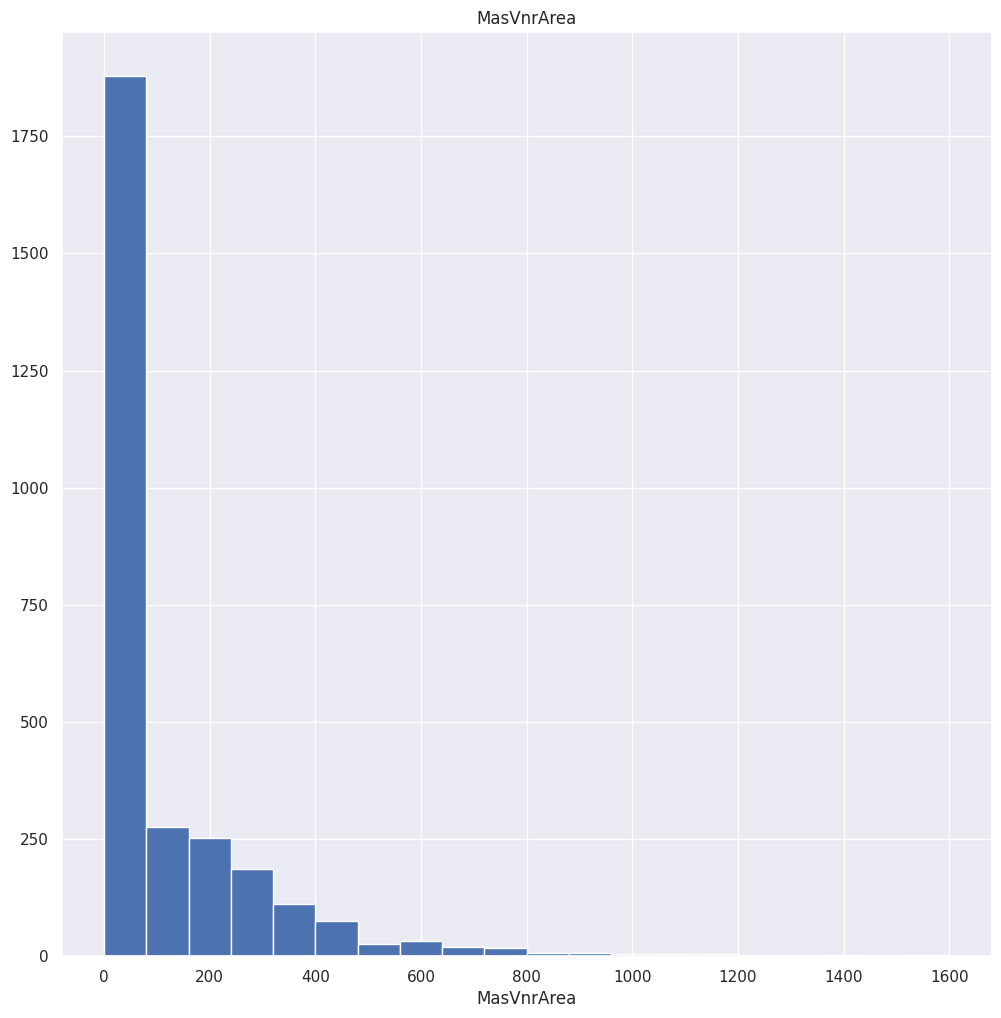

count   2920.000
mean     443.640
std      456.020
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%      218.600
50%      383.500
60%      525.600
70%      655.000
80%      806.400
90%     1065.500
95%     1274.000
99%     1572.810
max     5644.000
Name: BsmtFinSF1, dtype: float64


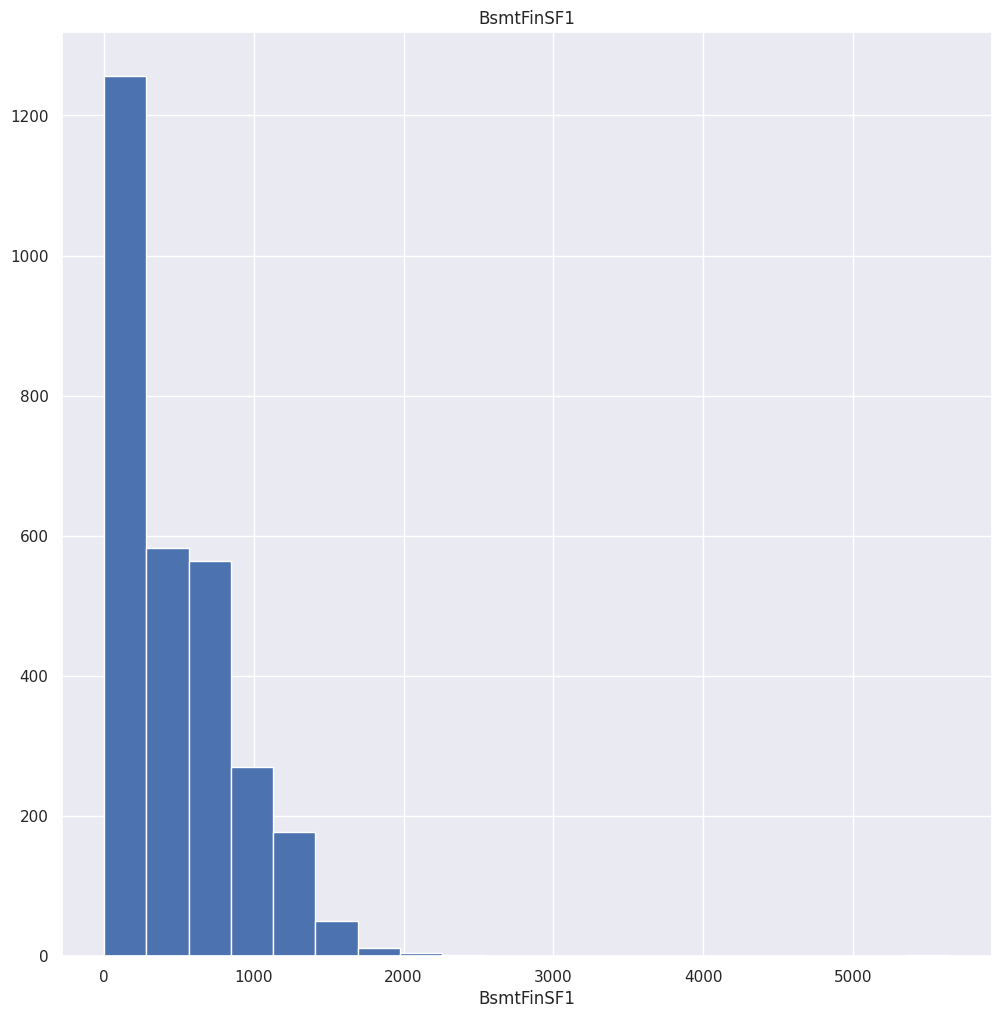

count   2920.000
mean      46.549
std      161.292
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%      117.200
95%      396.200
99%      837.580
max     1474.000
Name: BsmtFinSF2, dtype: float64


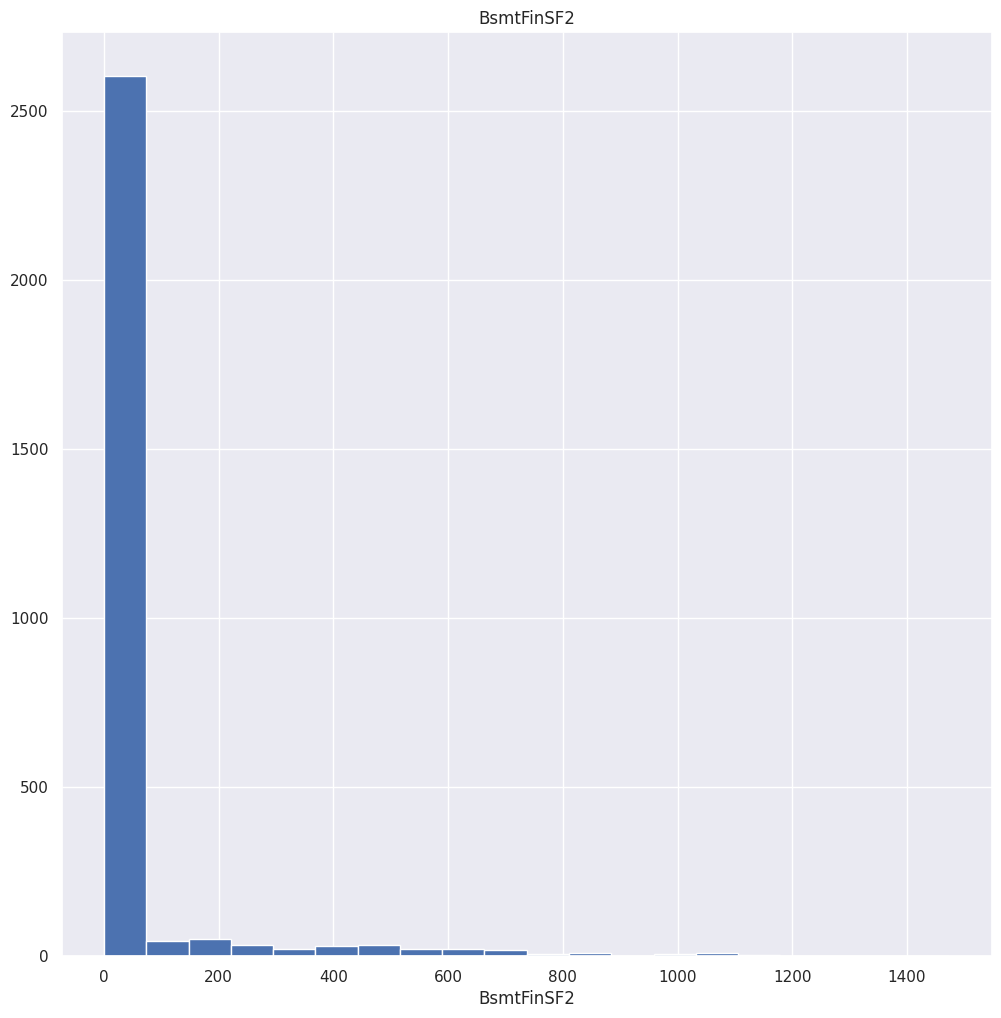

count   2920.000
mean     567.240
std      441.791
min        0.000
5%         0.000
10%       74.900
20%      172.000
30%      280.000
40%      374.600
50%      477.500
60%      604.400
70%      736.000
80%      896.000
90%     1232.000
95%     1468.000
99%     1799.050
max     2336.000
Name: BsmtUnfSF, dtype: float64


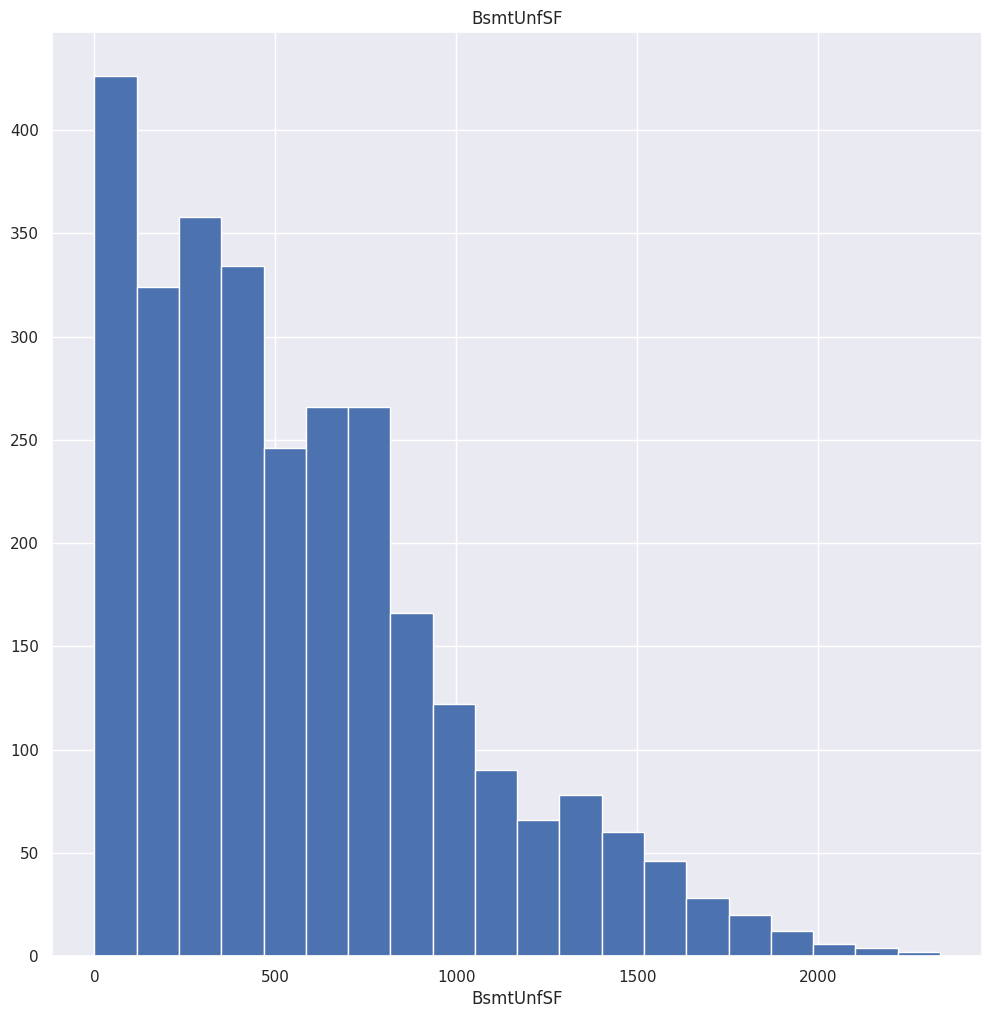

count   2920.000
mean    1057.429
std      438.630
min        0.000
5%       519.300
10%      636.900
20%      755.800
30%      840.000
40%      910.000
50%      991.500
60%     1088.000
70%     1216.000
80%     1391.200
90%     1602.200
95%     1753.000
99%     2157.050
max     6110.000
Name: TotalBsmtSF, dtype: float64


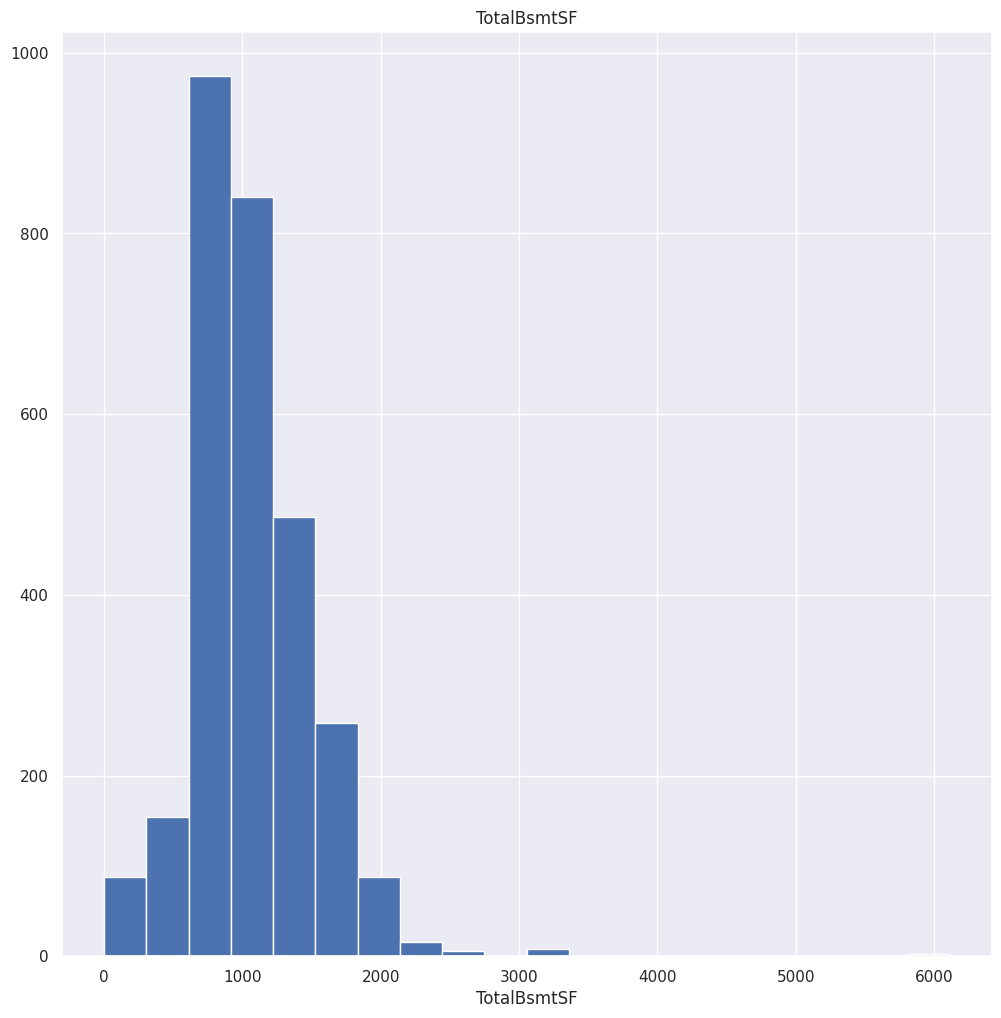

count   2920.000
mean    1162.627
std      386.522
min      334.000
5%       672.950
10%      756.900
20%      848.000
30%      915.700
40%     1000.200
50%     1087.000
60%     1182.000
70%     1314.000
80%     1482.400
90%     1680.000
95%     1831.250
99%     2221.860
max     4692.000
Name: 1stFlrSF, dtype: float64


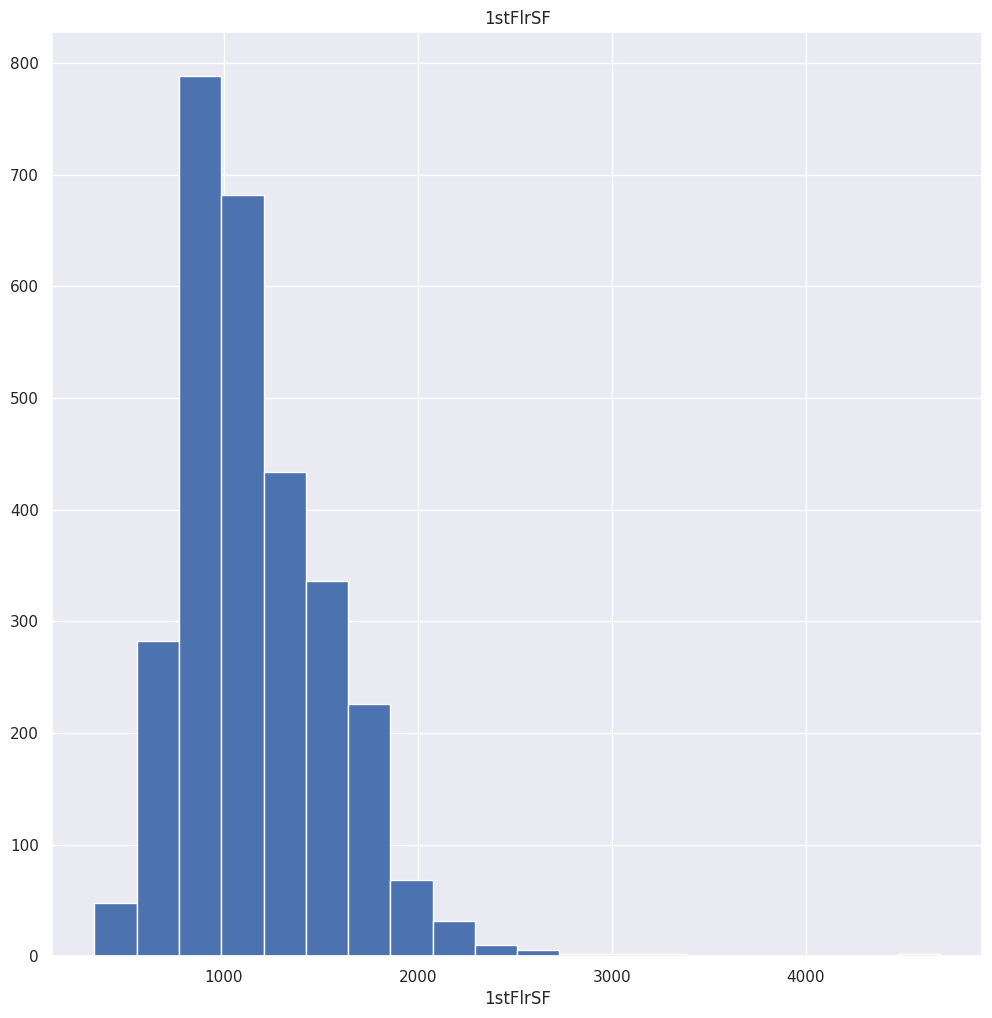

count   2920.000
mean     346.992
std      436.454
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%      455.400
70%      672.000
80%      796.200
90%      954.200
95%     1141.050
99%     1423.720
max     2065.000
Name: 2ndFlrSF, dtype: float64


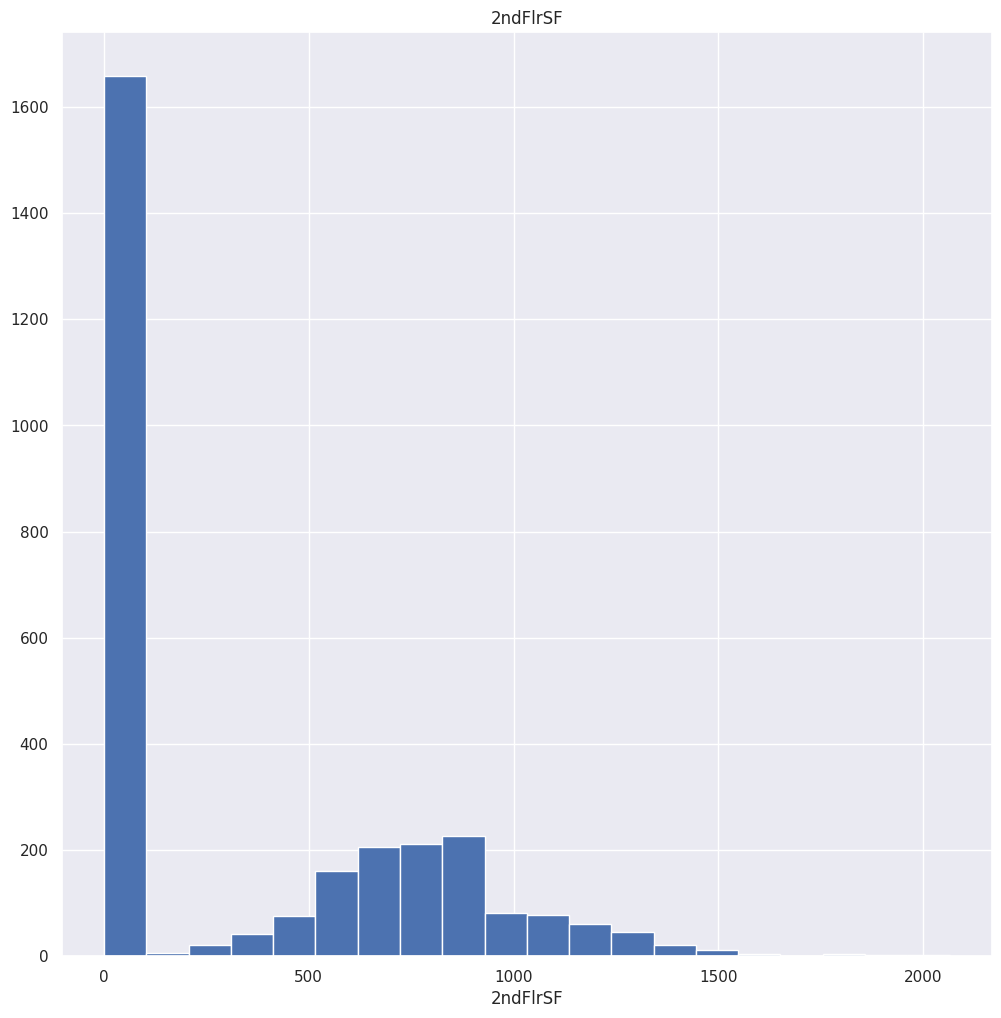

count   2920.000
mean       5.845
std       48.615
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%        0.000
99%      360.000
max      572.000
Name: LowQualFinSF, dtype: float64


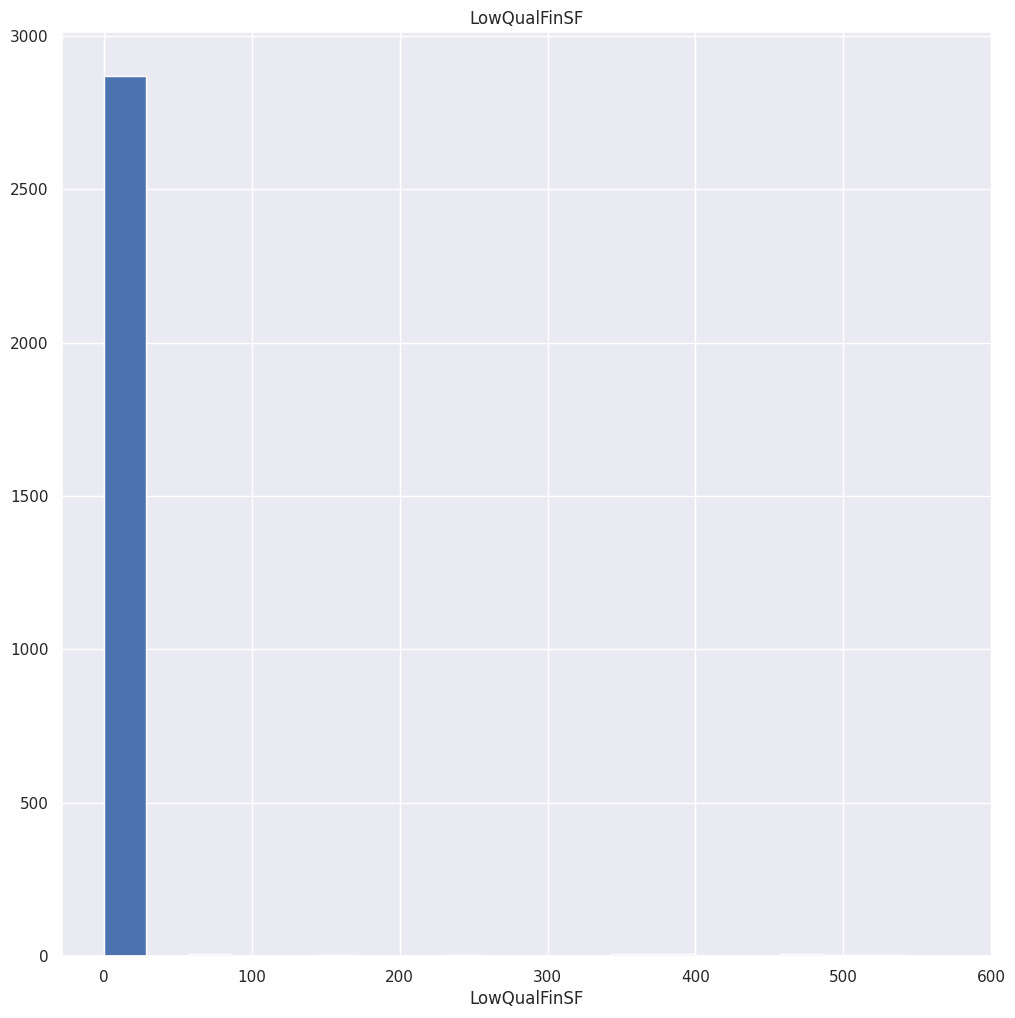

count   2920.000
mean    1515.464
std      525.390
min      334.000
5%       848.000
10%      912.000
20%     1066.600
30%     1208.000
40%     1339.000
50%     1464.000
60%     1578.000
70%     1709.300
80%     1869.000
90%     2158.300
95%     2466.100
99%     3134.680
max     5642.000
Name: GrLivArea, dtype: float64


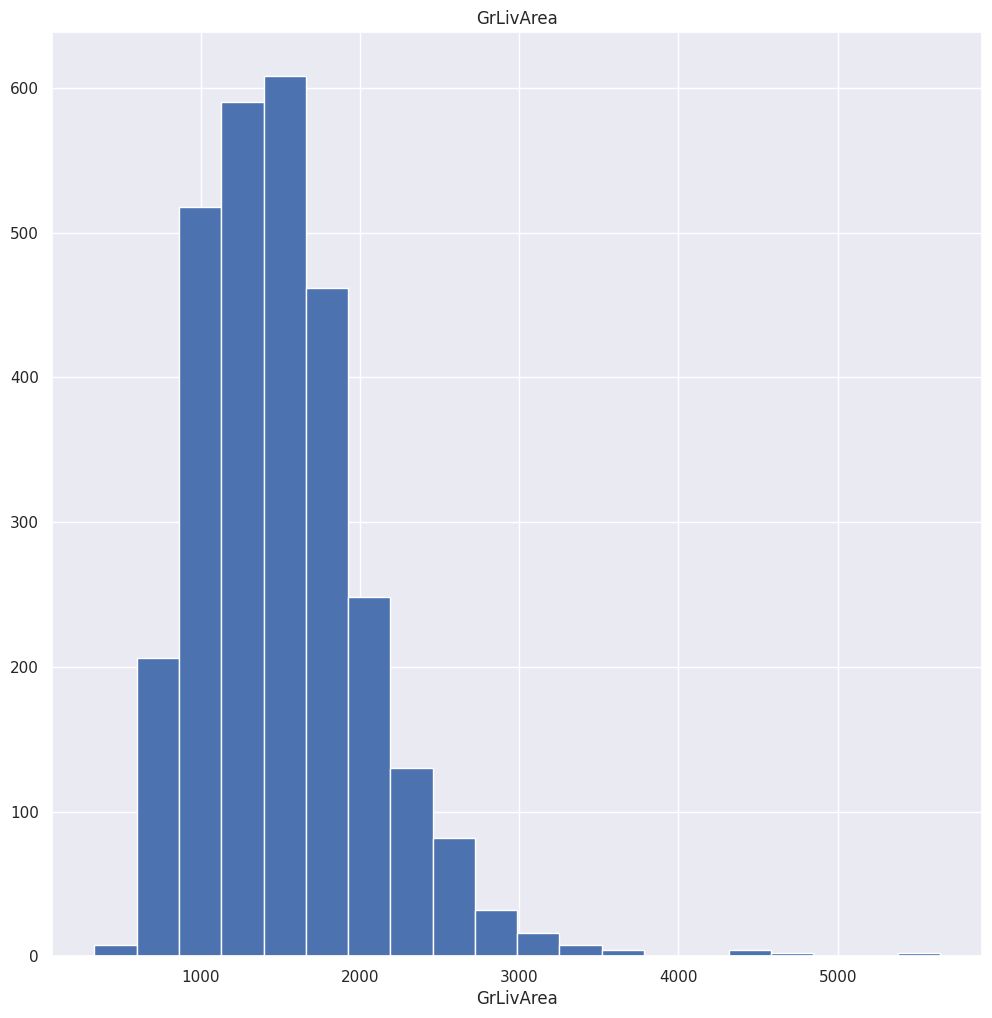

count   2920.000
mean       6.518
std        1.625
min        2.000
5%         4.000
10%        5.000
20%        5.000
30%        6.000
40%        6.000
50%        6.000
60%        7.000
70%        7.000
80%        8.000
90%        9.000
95%       10.000
99%       11.000
max       14.000
Name: TotRmsAbvGrd, dtype: float64


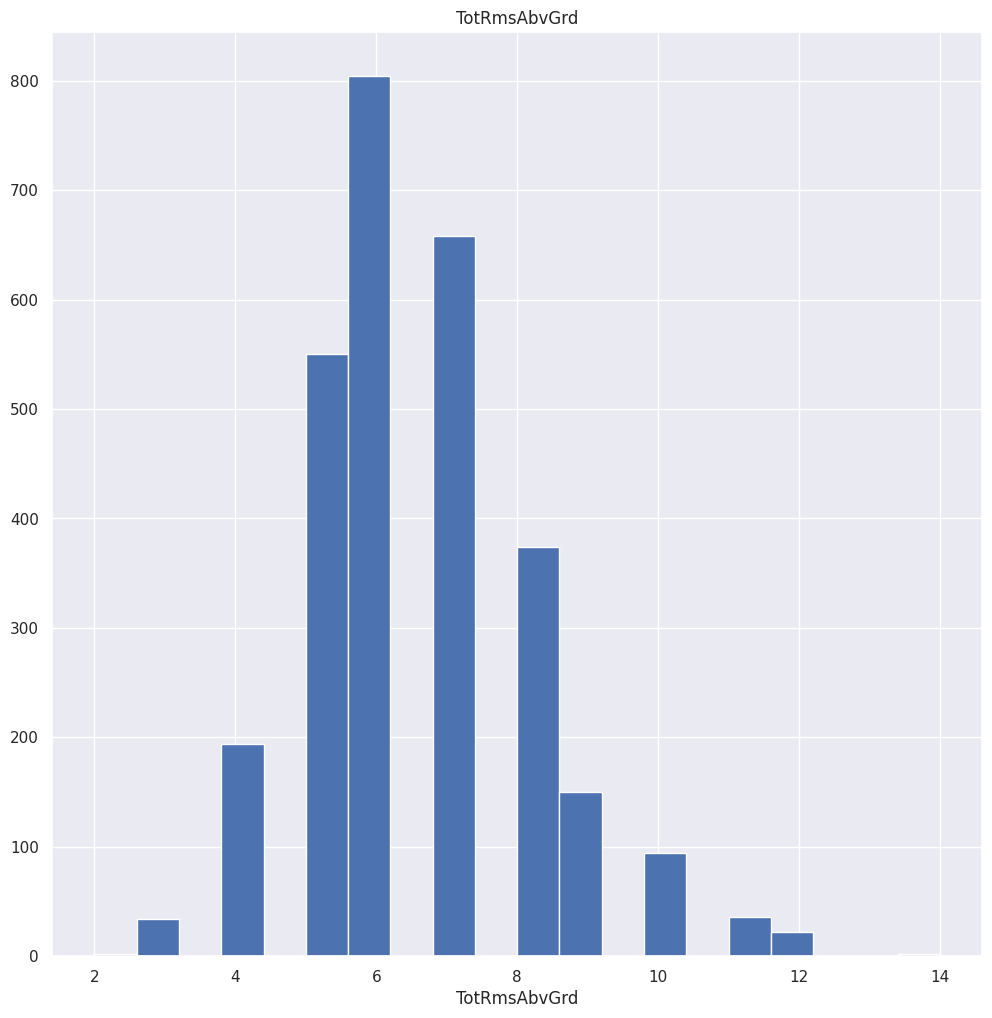

count   2758.000
mean    1978.506
std       24.685
min     1900.000
5%      1930.000
10%     1945.000
20%     1957.000
30%     1965.000
40%     1973.000
50%     1980.000
60%     1993.000
70%     1999.000
80%     2004.000
90%     2006.000
95%     2007.000
99%     2009.000
max     2010.000
Name: GarageYrBlt, dtype: float64


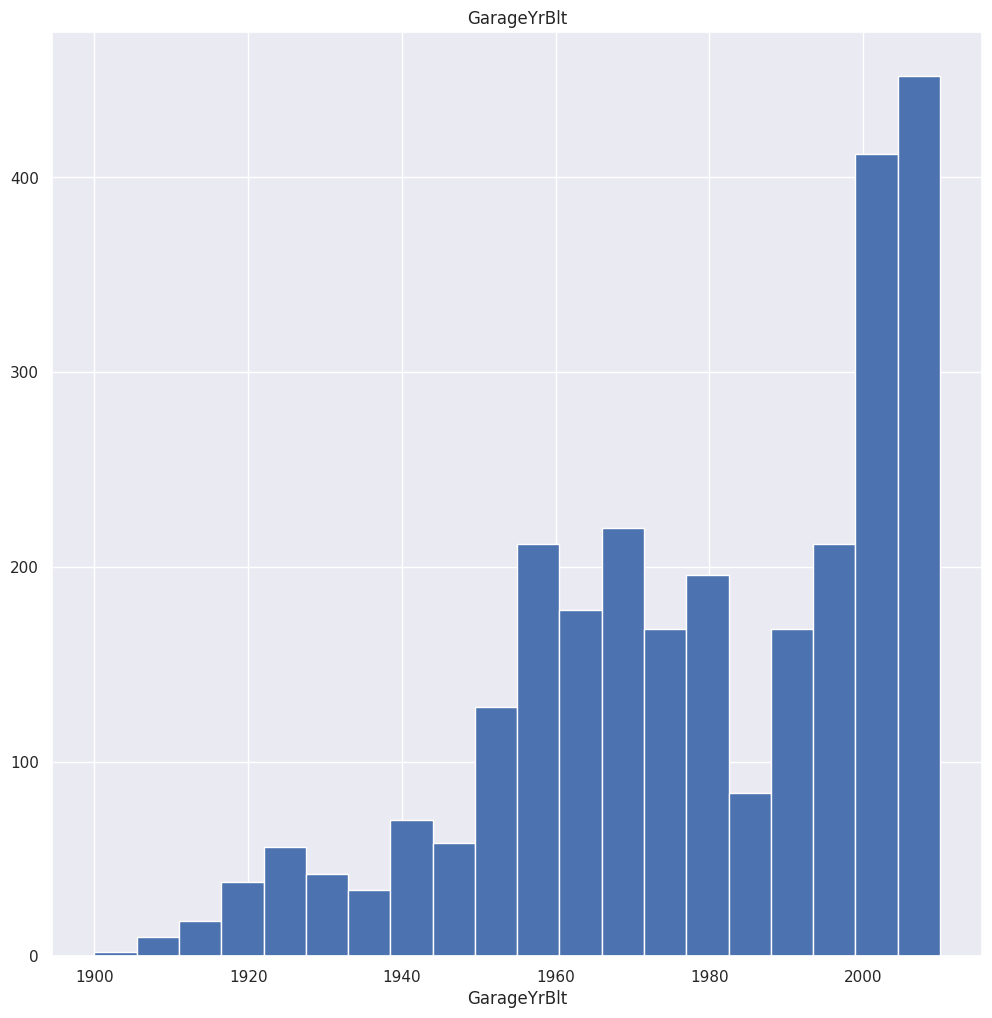

count   2920.000
mean     472.980
std      213.768
min        0.000
5%         0.000
10%      240.000
20%      295.600
30%      384.000
40%      440.000
50%      480.000
60%      516.000
70%      560.000
80%      620.200
90%      757.100
95%      850.100
99%     1010.390
max     1418.000
Name: GarageArea, dtype: float64


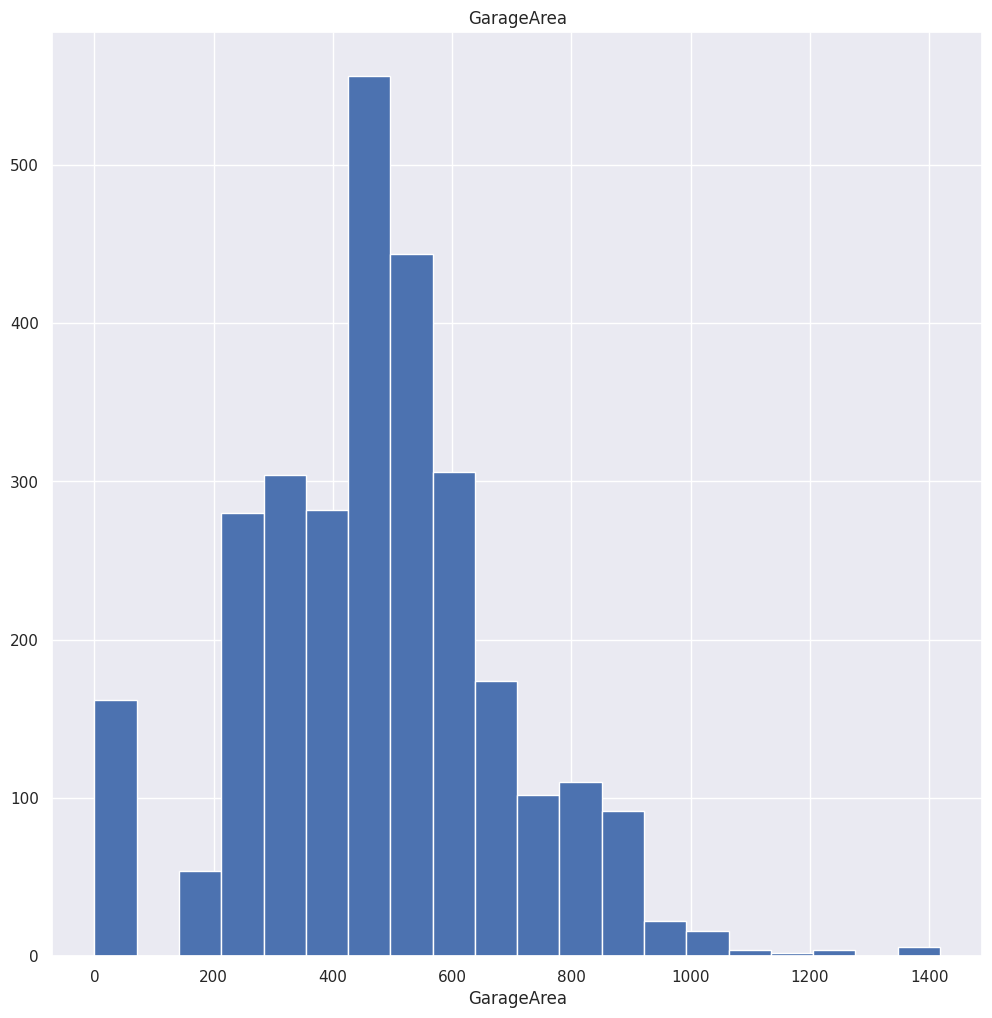

count   2920.000
mean      94.245
std      125.317
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%      100.000
70%      144.000
80%      192.000
90%      262.000
95%      335.000
99%      507.860
max      857.000
Name: WoodDeckSF, dtype: float64


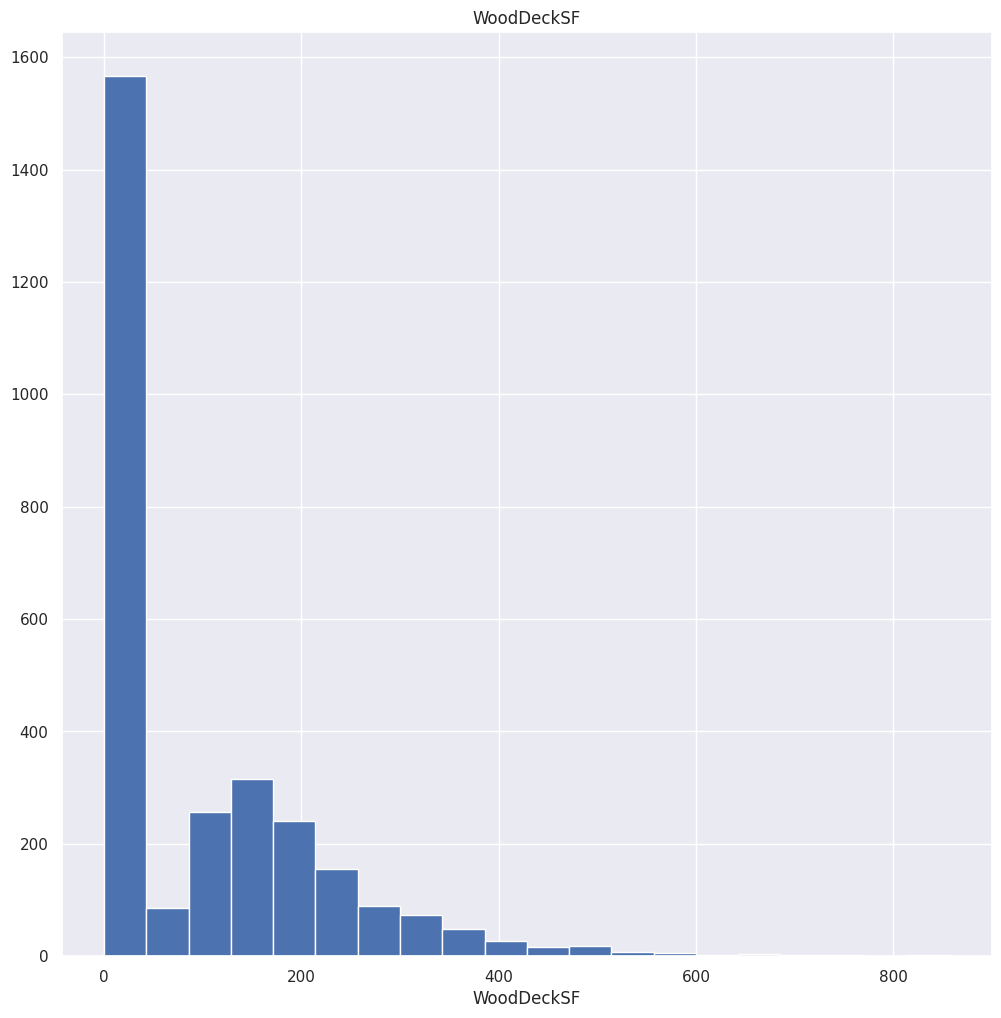

count   2920.000
mean      46.660
std       66.245
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%       25.000
60%       40.000
70%       57.000
80%       83.200
90%      130.000
95%      175.050
99%      286.620
max      547.000
Name: OpenPorchSF, dtype: float64


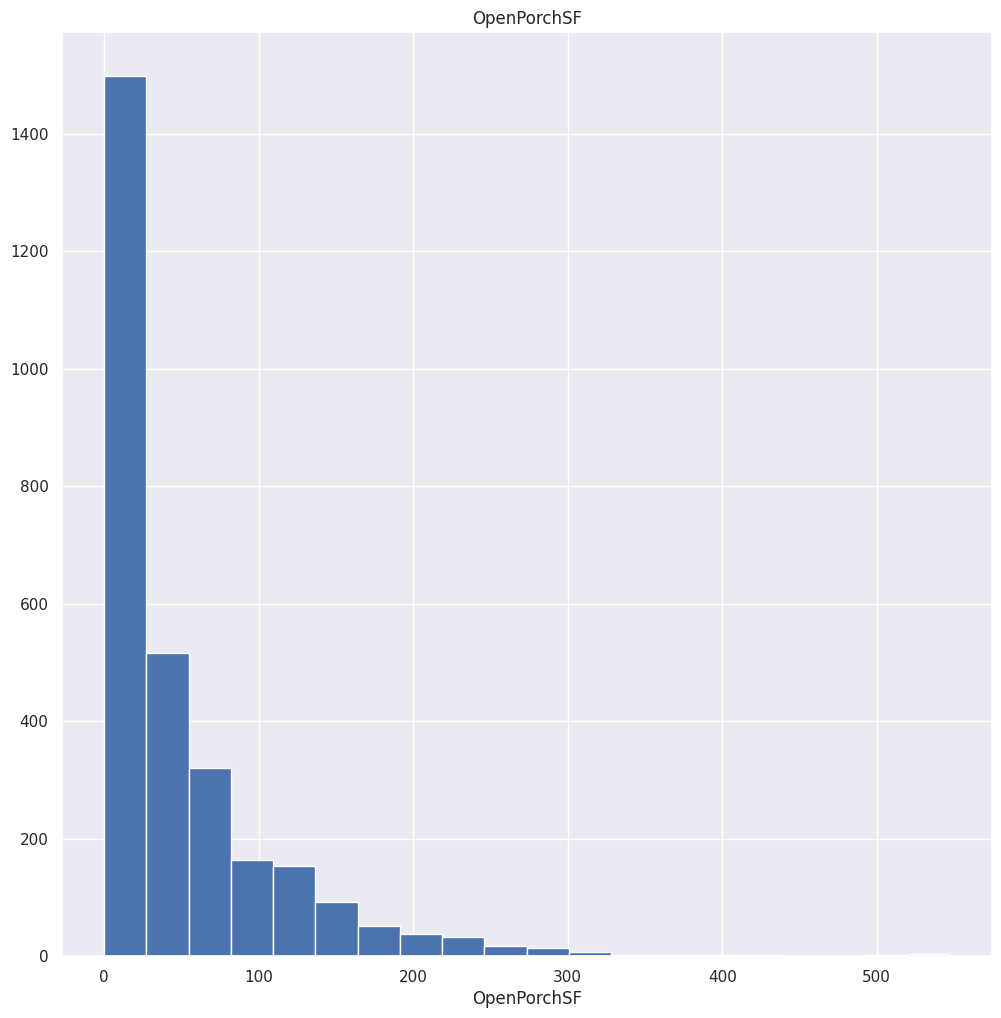

count   2920.000
mean      21.954
std       61.109
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%      112.000
95%      180.150
99%      263.050
max      552.000
Name: EnclosedPorch, dtype: float64


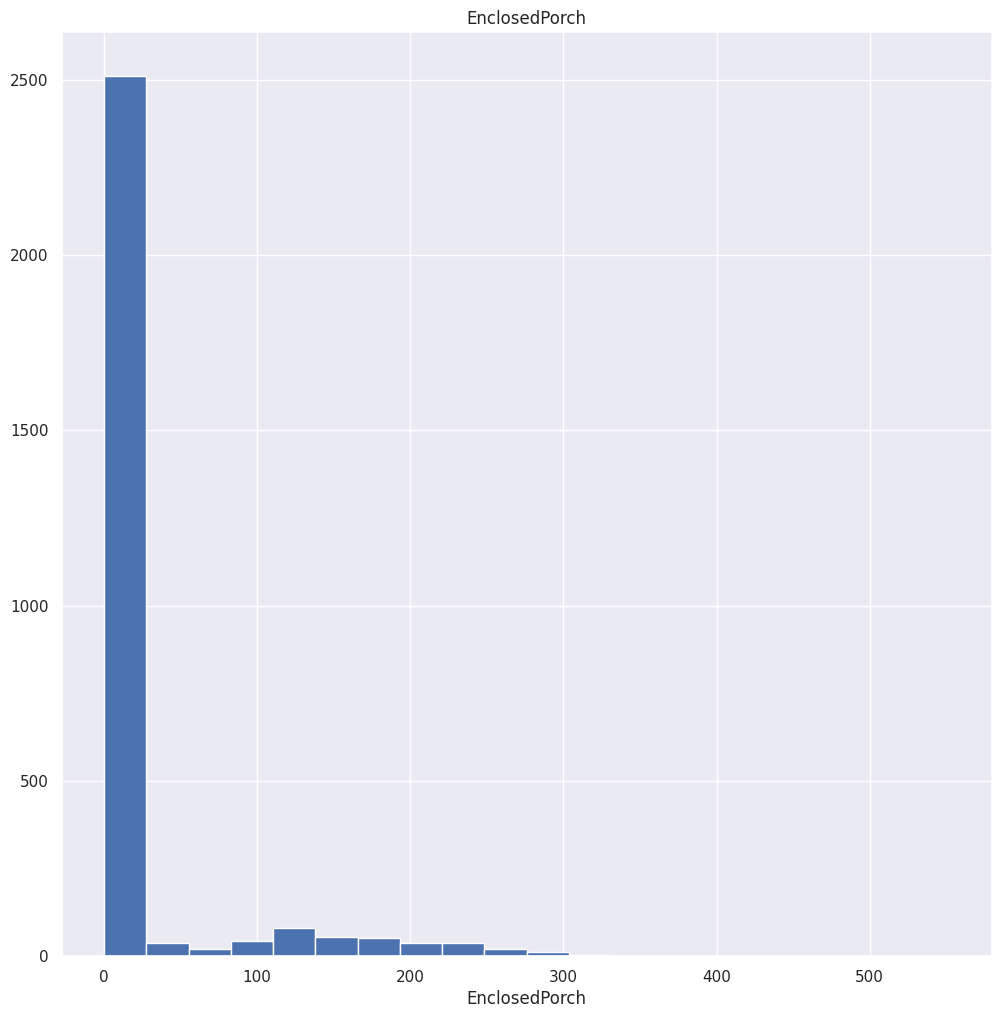

count   2920.000
mean       3.410
std       29.312
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%        0.000
99%      168.000
max      508.000
Name: 3SsnPorch, dtype: float64


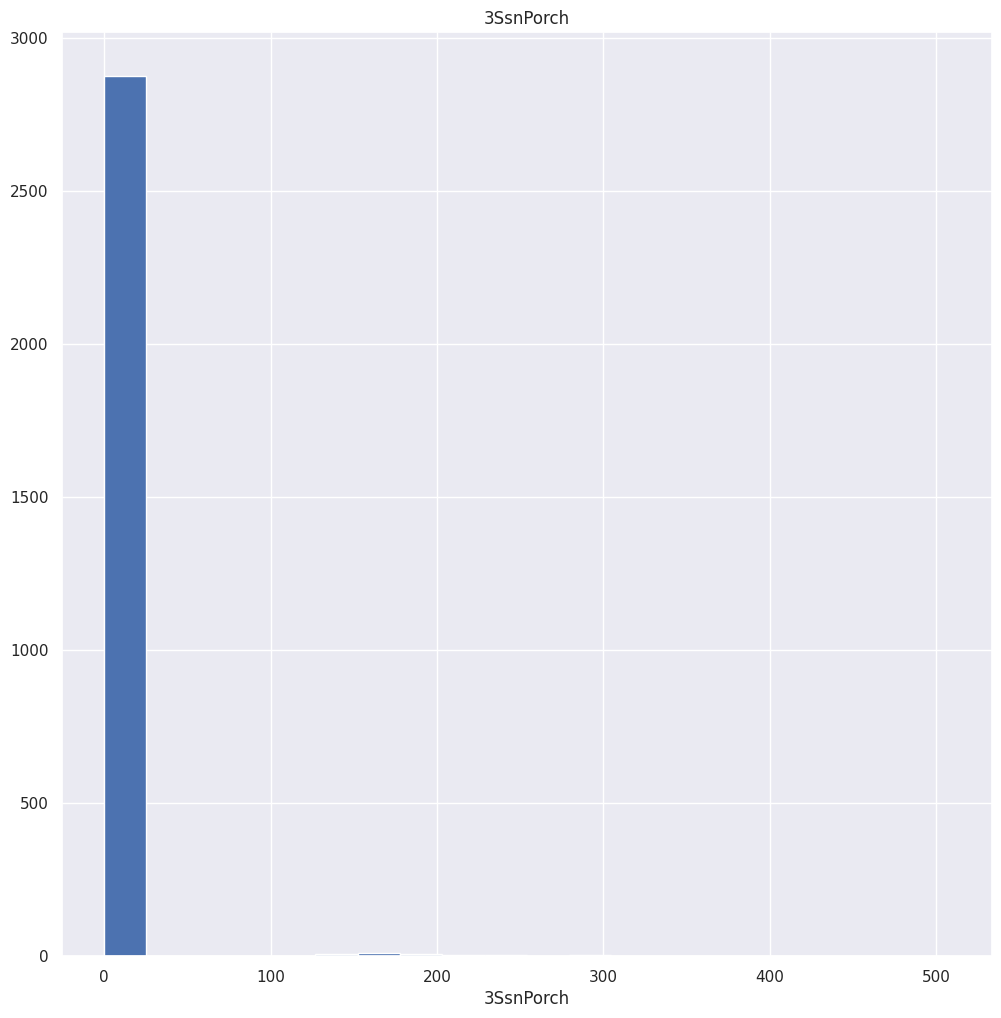

count   2920.000
mean      15.061
std       55.748
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%      160.000
99%      270.050
max      480.000
Name: ScreenPorch, dtype: float64


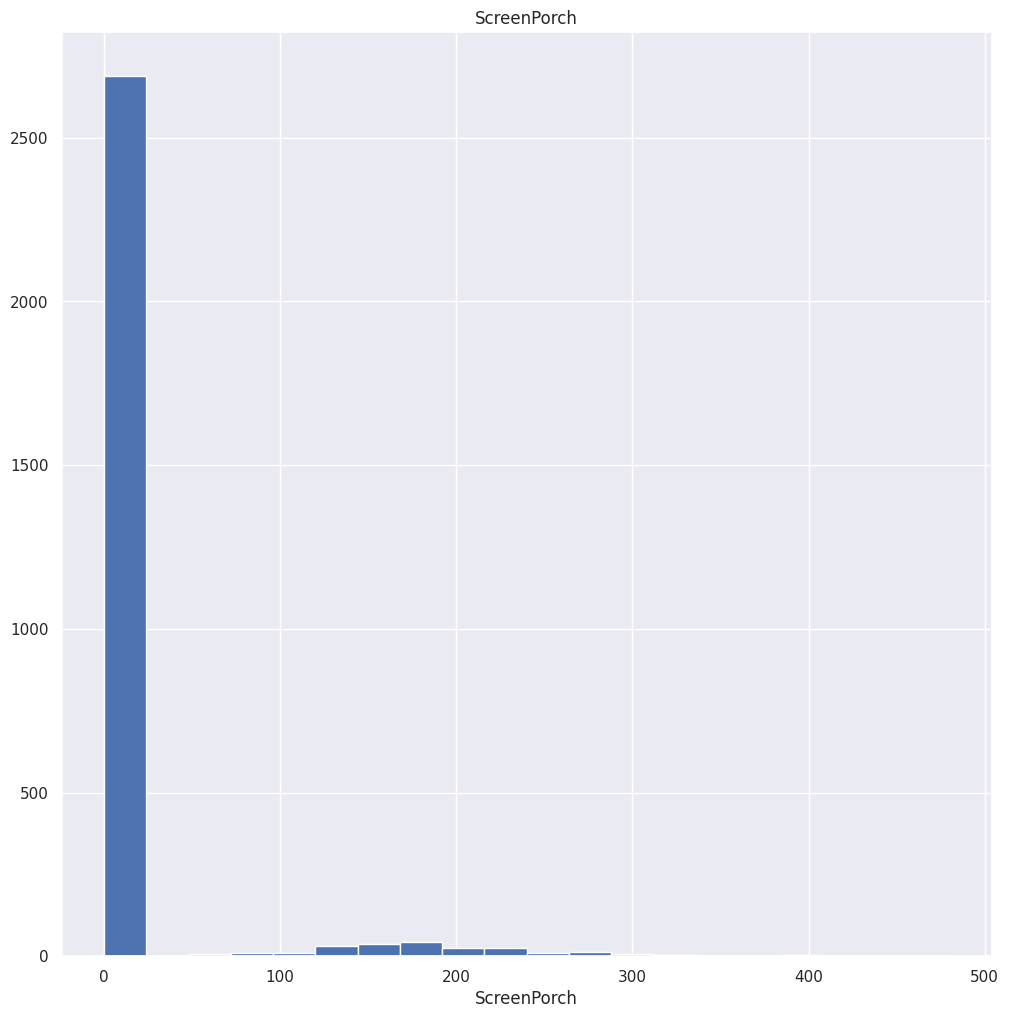

count    2920.000
mean       43.489
std       496.038
min         0.000
5%          0.000
10%         0.000
20%         0.000
30%         0.000
40%         0.000
50%         0.000
60%         0.000
70%         0.000
80%         0.000
90%         0.000
95%         0.000
99%       700.000
max     15500.000
Name: MiscVal, dtype: float64


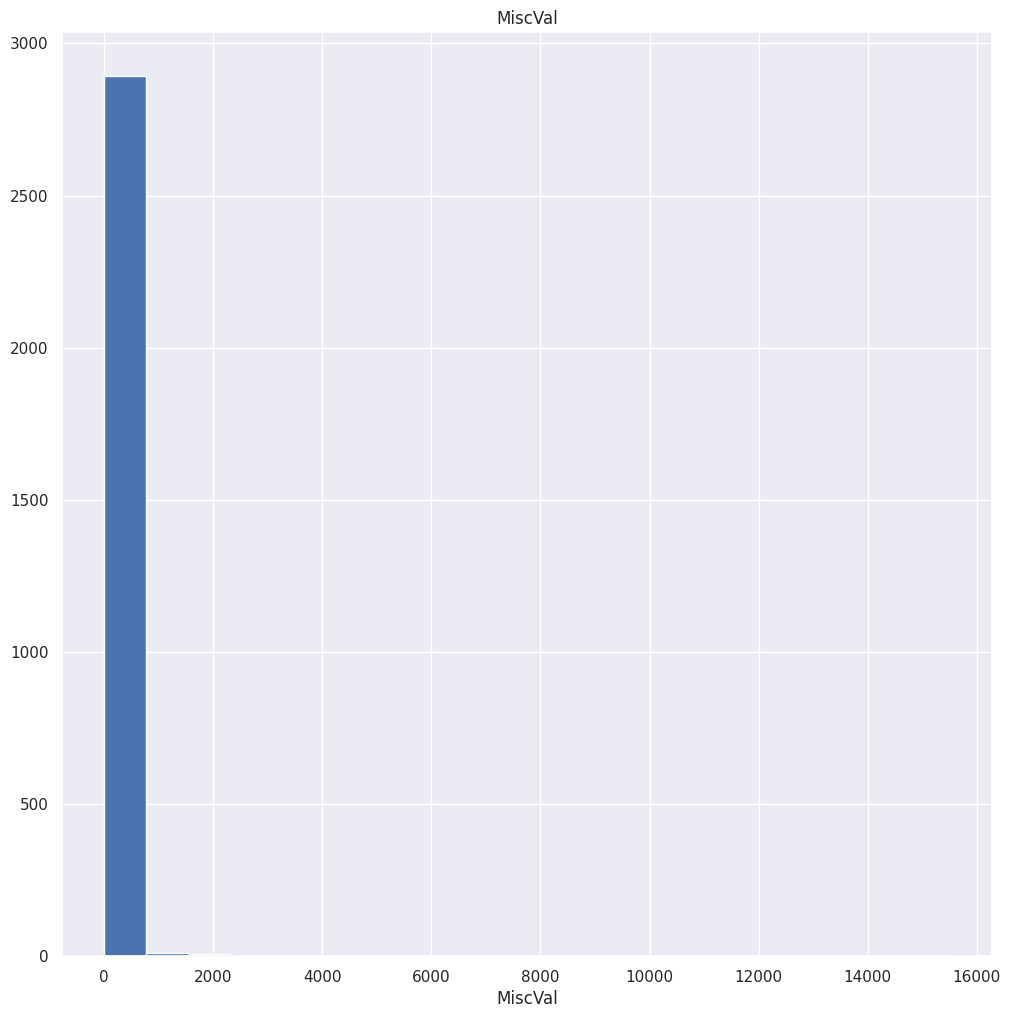

count   2920.000
mean       6.322
std        2.703
min        1.000
5%         2.000
10%        3.000
20%        4.000
30%        5.000
40%        6.000
50%        6.000
60%        7.000
70%        7.000
80%        8.000
90%       10.000
95%       11.000
99%       12.000
max       12.000
Name: MoSold, dtype: float64


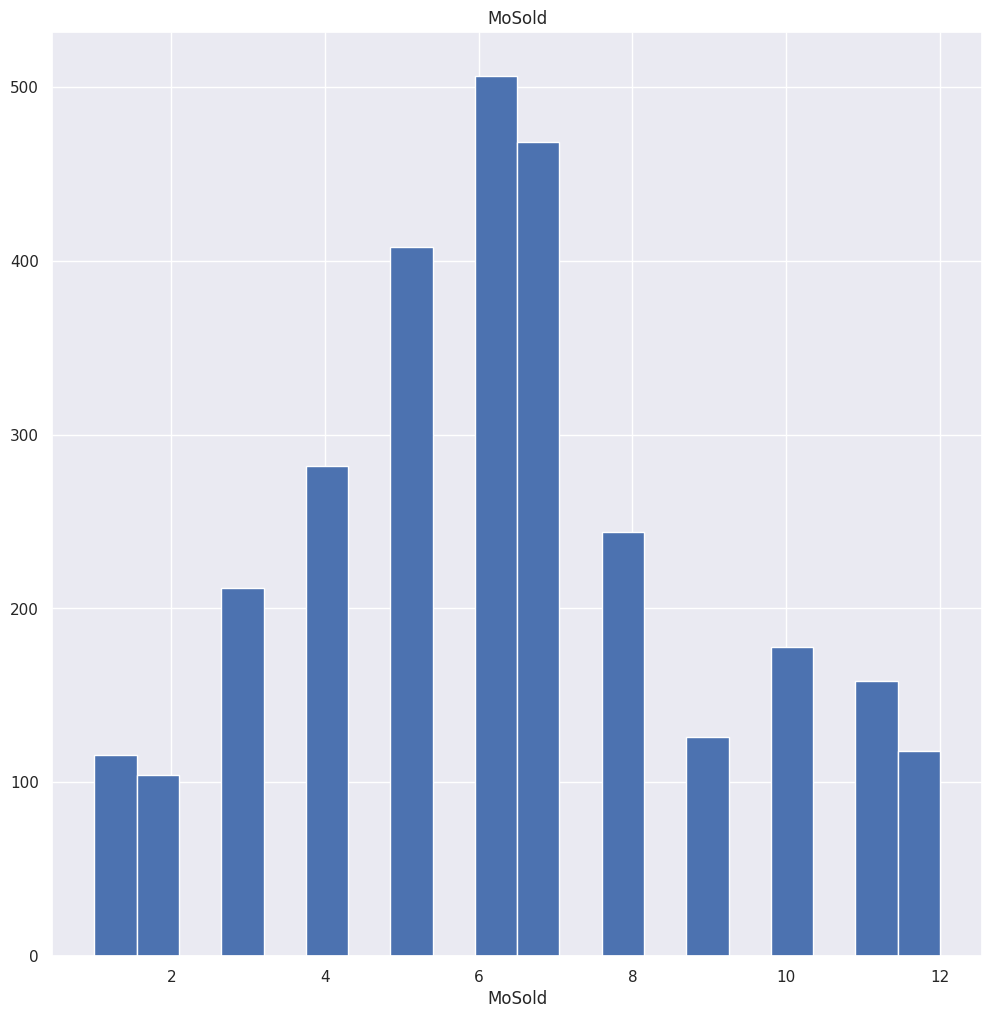

count     2920.000
mean    180921.196
std      79428.894
min      34900.000
5%       88000.000
10%     106475.000
20%     124000.000
30%     135500.000
40%     147000.000
50%     163000.000
60%     179280.000
70%     198620.000
80%     230000.000
90%     278000.000
95%     326100.000
99%     445071.410
max     755000.000
Name: SalePrice, dtype: float64


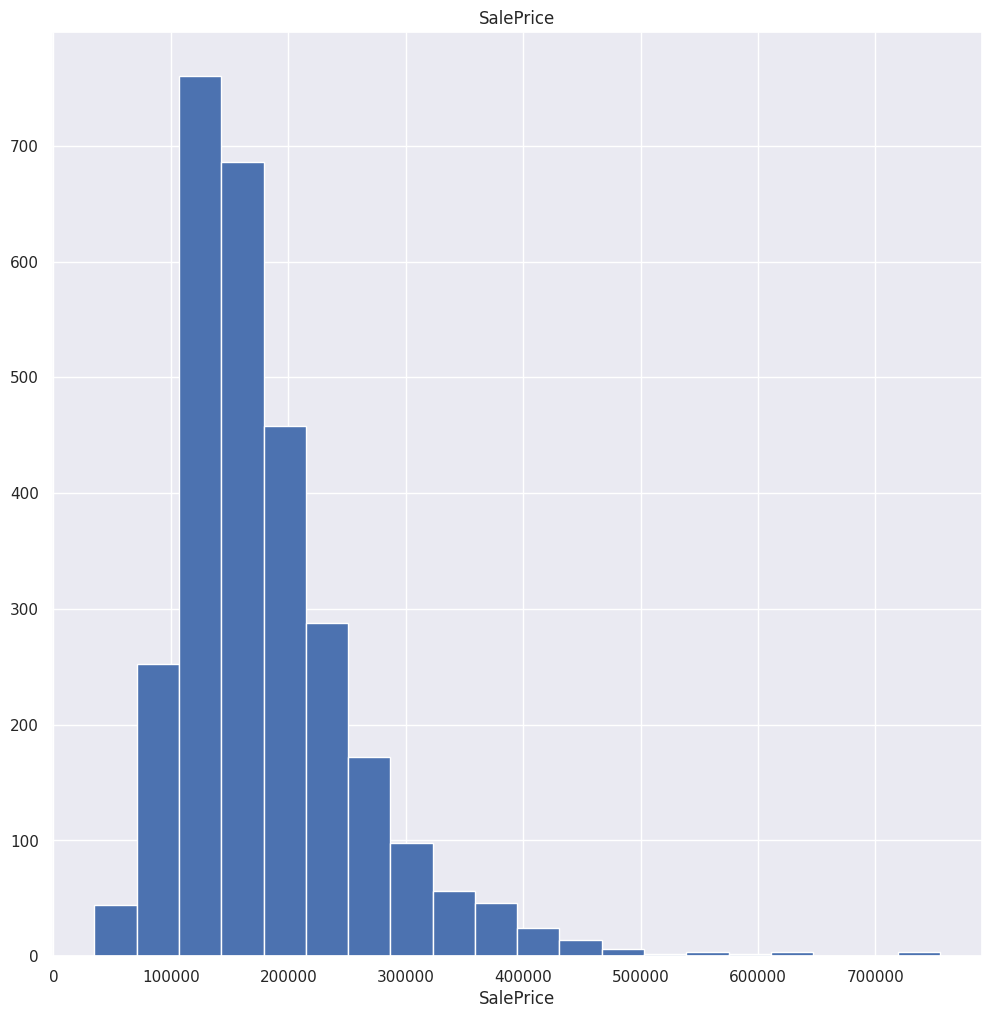

In [181]:
for col in num_cols:
  num_summary(df, col, True)

In [182]:
# Hedef Değişken Analizi

In [183]:
def target_summary_with_cat(dataframe, target, categorical_col):
  print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

In [184]:
for col in cat_cols:
  target_summary_with_cat(df, "SalePrice", col)

          TARGET_MEAN
MSZoning             
C (all)     74528.000
FV         214014.062
RH         131558.375
RL         191004.995
RM         126316.830


        TARGET_MEAN
Street             
Grvl     130190.500
Pave     181130.539


       TARGET_MEAN
Alley             
Grvl    122219.080
Pave    168000.585


          TARGET_MEAN
LotShape             
IR1        206101.665
IR2        239833.366
IR3        216036.500
Reg        164754.818


             TARGET_MEAN
LandContour             
Bnk           143104.079
HLS           231533.940
Low           203661.111
Lvl           180183.747


           TARGET_MEAN
Utilities             
AllPub      180950.957
NoSeWa      137500.000


           TARGET_MEAN
LotConfig             
Corner      181623.426
CulDSac     223854.617
FR2         177934.574
FR3         208475.000
Inside      176938.048


           TARGET_MEAN
LandSlope             
Gtl         179956.800
Mod         196734.138
Sev         204379.231


            TARGET_MEAN


In [185]:
# Transformation

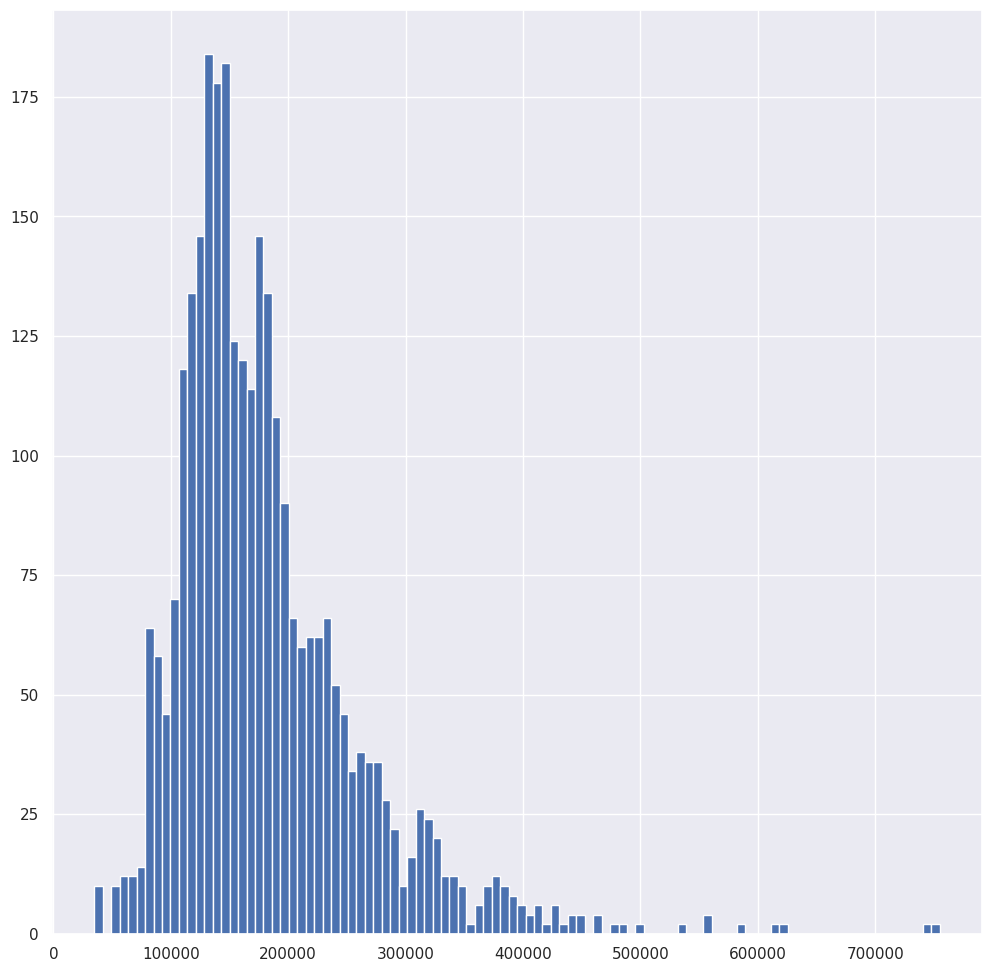

In [186]:
# Bağımlı değişkinimize bakalım
df["SalePrice"].hist(bins=100)
plt.show()

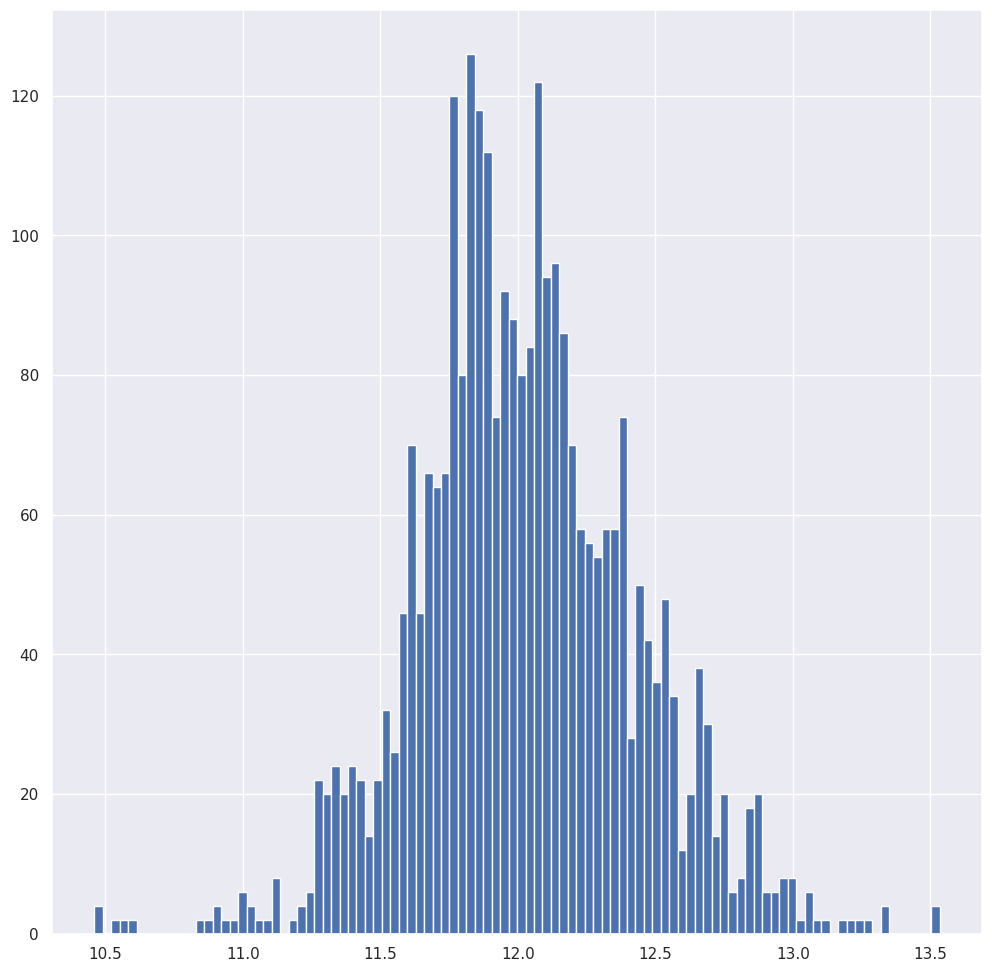

In [187]:
# Hedef değişkenin logaritmasını alalım
np.log1p(df["SalePrice"]).hist(bins=100)
plt.show()

In [188]:
 # Korelasyon Analizi

In [189]:
corr = df[num_cols].corr()
print(corr)

                  Id  MSSubClass  LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  \
Id             1.000       0.011       -0.011   -0.033       -0.028     -0.013        -0.022   
MSSubClass     0.011       1.000       -0.386   -0.140        0.033      0.028         0.041   
LotFrontage   -0.011      -0.386        1.000    0.426        0.252      0.123         0.089   
LotArea       -0.033      -0.140        0.426    1.000        0.106      0.014         0.014   
OverallQual   -0.028       0.033        0.252    0.106        1.000      0.572         0.551   
YearBuilt     -0.013       0.028        0.123    0.014        0.572      1.000         0.593   
YearRemodAdd  -0.022       0.041        0.089    0.014        0.551      0.593         1.000   
MasVnrArea    -0.050       0.023        0.193    0.104        0.412      0.316         0.180   
BsmtFinSF1    -0.005      -0.070        0.234    0.214        0.240      0.250         0.128   
BsmtFinSF2    -0.006      -0.066        

In [190]:
# Korelasyonların Gösterilmesi

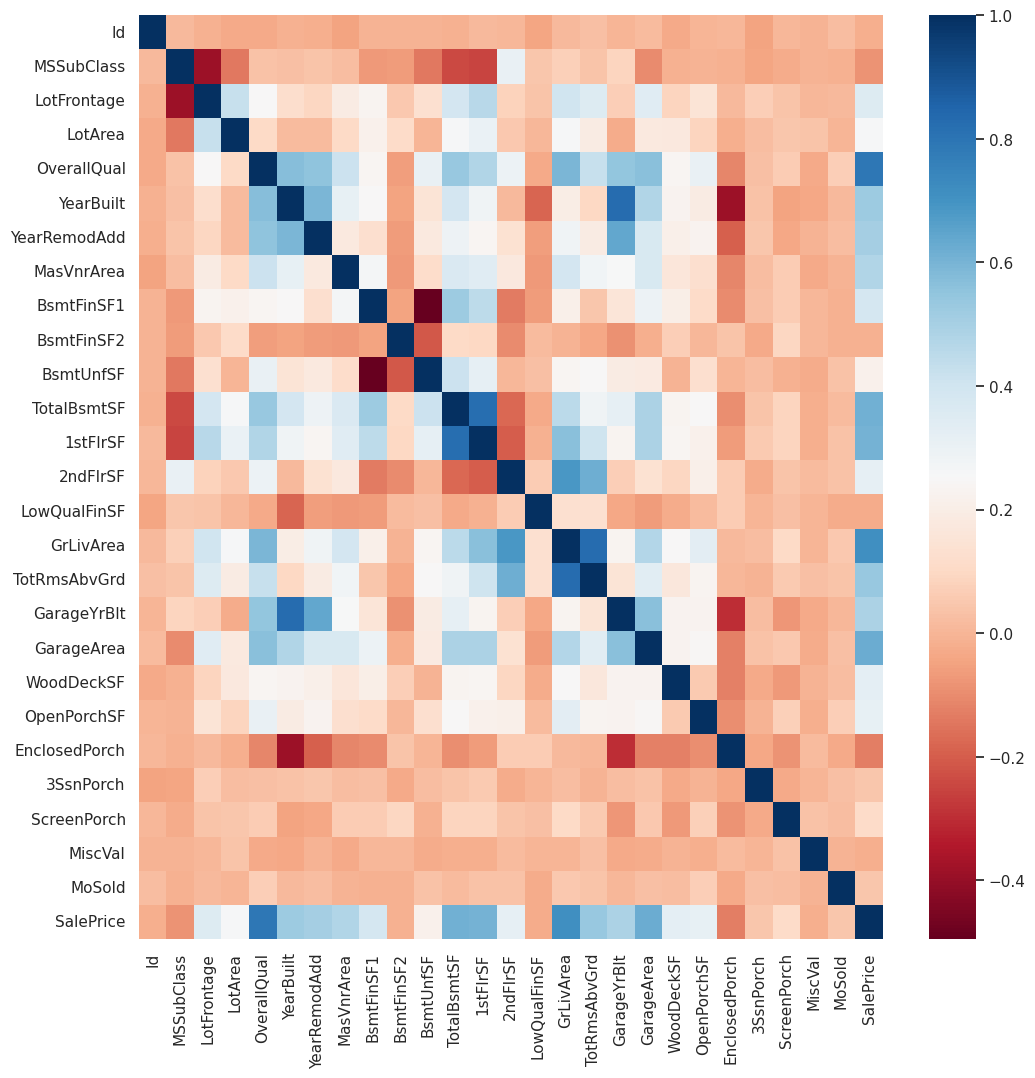

In [191]:
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu")
plt.show()

In [192]:
# Aykırı Değer Analizi
def outlier_thresholds(dataframe, col_name, q1=0.10, q3=0.90):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)
  interquantile_range = quartile3 - quartile1
  up_limit = quartile3 + 1.5 * interquantile_range
  low_limit = quartile1 - 1.5 * interquantile_range
  return low_limit, up_limit

In [193]:
# Aykırı Değer Kontrolü
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [194]:
for col in num_cols:
  if col != "SalePrice":   # SalePrice hedef değişkenimiz olduğu için katmıyoruz
    print(col, check_outlier(df, col))

Id False
MSSubClass False
LotFrontage True
LotArea True
OverallQual False
YearBuilt False
YearRemodAdd False
MasVnrArea True
BsmtFinSF1 True
BsmtFinSF2 True
BsmtUnfSF False
TotalBsmtSF True
1stFlrSF True
2ndFlrSF False
LowQualFinSF True
GrLivArea True
TotRmsAbvGrd False
GarageYrBlt False
GarageArea False
WoodDeckSF True
OpenPorchSF True
EnclosedPorch True
3SsnPorch True
ScreenPorch True
MiscVal True
MoSold False


In [195]:
# Aykırı Değerlerin Baskılanması
def replace_with_thresholds(dataframe, variable):
  low_limit, up_limit = outlier_thresholds(dataframe, variable)
  dataframe.loc[(dataframe[variable] < low_limit) , variable] = low_limit   # Alt aykırı değer varsa low_limit ' e eşitle
  dataframe.loc[(dataframe[variable] > up_limit) , variable] = up_limit     # Üst aykırı değer varsa up_limit ' e eşitle

In [196]:
for col in num_cols:
  if col != "SalePrice":    # SalePrice hedef değişkenimiz olduğu için katmıyoruz
    replace_with_thresholds(df, col)

In [197]:
for col in num_cols:
  if col != "SalePrice":    # SalePrice hedef değişkenimiz olduğu için katmıyoruz
    print(col, check_outlier(df, col))

Id False
MSSubClass False
LotFrontage False
LotArea False
OverallQual False
YearBuilt False
YearRemodAdd False
MasVnrArea False
BsmtFinSF1 False
BsmtFinSF2 False
BsmtUnfSF False
TotalBsmtSF False
1stFlrSF False
2ndFlrSF False
LowQualFinSF False
GrLivArea False
TotRmsAbvGrd False
GarageYrBlt False
GarageArea False
WoodDeckSF False
OpenPorchSF False
EnclosedPorch False
3SsnPorch False
ScreenPorch False
MiscVal False
MoSold False


In [198]:
# Eksik Değer Analizi

In [199]:
# Eksik değer varsa eksik değerlerin toplamını ve oranını yazdıran fonksiyon
def missing_values_table(dataframe, na_name=False):
  na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
  n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)      # Her bir kolondaki eksik gözlem sayısını verir
  ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)   # Kolon içerisinde yüzde kaç eksik gözlem olduğunu verir
  missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss", "ratio"])
  print(missing_df, end="\n")

  if na_name:
    return na_columns

In [200]:
missing_values_table(df)

              n_miss  ratio
PoolQC          2906 99.520
MiscFeature     2812 96.300
Alley           2738 93.770
Fence           2358 80.750
MasVnrType      1744 59.730
FireplaceQu     1380 47.260
LotFrontage      518 17.740
GarageType       162  5.550
GarageYrBlt      162  5.550
GarageFinish     162  5.550
GarageQual       162  5.550
GarageCond       162  5.550
BsmtFinType2      76  2.600
BsmtExposure      76  2.600
BsmtFinType1      74  2.530
BsmtCond          74  2.530
BsmtQual          74  2.530
MasVnrArea        16  0.550
Electrical         2  0.070


In [201]:
# Bazı Değişkenlerdeki Boş değerler evin o özelliğe sahip olmadığını ifade edebilir.
no_cols = ["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu",
           "GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]

In [202]:
# Madem bu özelliklerde eksiklik olmaması anlıma geliyorsa biz bunları "No" ile dolduralım
for col in no_cols:
  df[col].fillna("No", inplace=True)

In [203]:
missing_values_table(df)

             n_miss  ratio
MasVnrType     1744 59.730
LotFrontage     518 17.740
GarageYrBlt     162  5.550
MasVnrArea       16  0.550
Electrical        2  0.070


In [204]:
 # Bu fonksiyon eksik değerlerin median veya mean ile doldurulmasını sağlar
def quick_missing_imp(data, num_method="median", cat_length=20, target="SalePrice"):
  variables_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]  # Eksik değere sahip olan değişkenler listelenir
  temp_target = data[target]

  print("# BEFORE")
  print(data[variables_with_na].isnull().sum(), "\n\n")   # Uygulama öncesi değişkenlerin eksik değerlerinin sayısı

  # Değişken object ve sınıf sayısı cat_length 'e eşit veya altındaysa boş değerleri mode ile doldurur
  data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis=0)

  # num_method mean ise tipi object olmayan değişkenlerin boş değerleri ortalama ile dolduruluyor
  if num_method == "mean":
    data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)

  # num_method median ise tipi object olmayan değişkenlerin boş değerleri ortalama ile dolduruluyor
  elif num_method == "median":
    data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)

  data[target] = temp_target

  print("# AFTER \n Imputation method ise 'MODE' for categorical variables!")
  print(" Imputation method is ' + num_method + ' for numerical variables! \n")
  print(data[variables_with_na].isnull().sum(), "\n\n")  # Uygulama sonrası değişkenlerin eksik değerlerinin sayısı
  return data

In [205]:
df = quick_missing_imp(df, num_method="median",cat_length=17)

# BEFORE
LotFrontage     518
MasVnrType     1744
MasVnrArea       16
Electrical        2
GarageYrBlt     162
dtype: int64 


# AFTER 
 Imputation method ise 'MODE' for categorical variables!
 Imputation method is ' + num_method + ' for numerical variables! 

LotFrontage    0
MasVnrType     0
MasVnrArea     0
Electrical     0
GarageYrBlt    0
dtype: int64 




In [206]:
# Rare Encoder

In [207]:
# Kategorik kolonların dağılımının incelenmesi

In [208]:
def rare_analyser(dataframe, target, catcols):
  for col in cat_cols:
    print(col, ":", len(dataframe[col].value_counts()))
    print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                        "RATIO": dataframe[col].value_counts() / len(dataframe),
                        "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [209]:
rare_analyser(df, "SalePrice", cat_cols)

MSZoning : 5
          COUNT  RATIO  TARGET_MEAN
MSZoning                           
C (all)      20  0.007    74528.000
FV          130  0.045   214014.062
RH           32  0.011   131558.375
RL         2302  0.788   191004.995
RM          436  0.149   126316.830


Street : 2
        COUNT  RATIO  TARGET_MEAN
Street                           
Grvl       12  0.004   130190.500
Pave     2908  0.996   181130.539


Alley : 3
       COUNT  RATIO  TARGET_MEAN
Alley                           
Grvl     100  0.034   122219.080
No      2738  0.938   183452.131
Pave      82  0.028   168000.585


LotShape : 4
          COUNT  RATIO  TARGET_MEAN
LotShape                           
IR1         968  0.332   206101.665
IR2          82  0.028   239833.366
IR3          20  0.007   216036.500
Reg        1850  0.634   164754.818


LandContour : 4
             COUNT  RATIO  TARGET_MEAN
LandContour                           
Bnk            126  0.043   143104.079
HLS            100  0.034   231533.940
Low 

In [210]:
# Nadir sınıfların tespit edilmesi

In [211]:
def rare_encoder(dataframe, rare_perc):
  temp_df = dataframe.copy()

  rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == "O"
                  and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

  for var in rare_columns:
    tmp = temp_df[var].value_counts() / len(temp_df)
    rare_labels = tmp[tmp < rare_perc].index
    temp_df[var] = np.where(temp_df[var].isin(rare_labels), "Rare", temp_df[var])
  return temp_df

In [212]:
# Biz threshold 'u %1 olarak belirledik
df = rare_encoder(df, 0.01)

In [213]:
rare_analyser(df, "SalePrice", cat_cols)

MSZoning : 5
          COUNT  RATIO  TARGET_MEAN
MSZoning                           
FV          130  0.045   214014.062
RH           32  0.011   131558.375
RL         2302  0.788   191004.995
RM          436  0.149   126316.830
Rare         20  0.007    74528.000


Street : 2
        COUNT  RATIO  TARGET_MEAN
Street                           
Pave     2908  0.996   181130.539
Rare       12  0.004   130190.500


Alley : 3
       COUNT  RATIO  TARGET_MEAN
Alley                           
Grvl     100  0.034   122219.080
No      2738  0.938   183452.131
Pave      82  0.028   168000.585


LotShape : 4
          COUNT  RATIO  TARGET_MEAN
LotShape                           
IR1         968  0.332   206101.665
IR2          82  0.028   239833.366
Rare         20  0.007   216036.500
Reg        1850  0.634   164754.818


LandContour : 4
             COUNT  RATIO  TARGET_MEAN
LandContour                           
Bnk            126  0.043   143104.079
HLS            100  0.034   231533.940
Low 

In [214]:
# Yeni değişkenler oluşturuyoruz ve oluşturduğumuz yeni değişkenlerin başına "NEW" ekleyebilirz.

In [215]:
df["NEW_1st*GrLiv"] = df["1stFlrSF"] * df["GrLivArea"]
df["NEW_Garage*GrLiv"] = (df["GarageArea"] * df["GrLivArea"])
df["TotalQual"] = df[["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtCond", "BsmtFinType1",
                      "BsmtFinType2", "HeatingQC", "KitchenQual", "Functional", "FireplaceQu", "GarageQual", "GarageCond", "Fence"]].sum(axis=1,numeric_only=True)

# Total Floor
df["NEW_TotalFlrSF"] = df["1stFlrSF"] + df["2ndFlrSF"]

# Total Finished Basement Area
df["NEW_TotalBsmtFin"] = df.BsmtFinSF1 + df.BsmtFinSF2

# Porch Area
df["NEW_PorchArea"] = df.OpenPorchSF + df.EnclosedPorch + df.ScreenPorch + df["3SsnPorch"] + df.WoodDeckSF

# Total House Area
df["NEW_TotalHouseArea"] = df.NEW_TotalFlrSF + df.TotalBsmtSF

df["NEW_TotalSqFeet"] = df.GrLivArea + df.TotalBsmtSF

# Lot Ratio
df["NEW_LotRatio"] = df.GrLivArea / df.LotArea
df["NEW_RatioArea"] = df.NEW_TotalHouseArea / df.LotArea
df["NEW_GarageLotRatio"] = df.GarageArea / df.LotArea

# MasVnrArea
df["NEW_MasVnrRatio"] = df.MasVnrArea / df.NEW_TotalHouseArea

#Dif Area
df["NEW_DifArea"] = (df.LotArea - df["1stFlrSF"] - df.GarageArea - df.NEW_PorchArea - df.WoodDeckSF)

df["NEW_OverallGrade"] = df["OverallQual"] * df["OverallCond"]

df["NEW_Restoration"] = df.YearRemodAdd - df.YearBuilt

df["NEW_HouseAge"] = df.YrSold - df.YearBuilt

df["NEW_RestorationAge"] = df.YrSold - df.YearRemodAdd

df["NEW_GarageAge"] = df.GarageYrBlt - df.YearBuilt

df["NEW_GarageRestorationAge"] = np.abs(df.GarageYrBlt - df.YearRemodAdd)

df["NEW_GarageSold"] = df.YrSold - df.GarageYrBlt

In [216]:
# Şimdi bazı feature 'larımız ya çok baskın %90 ve üzeri gibi ya da çoğu boş biz bunları insiyatif alarak çıkartabailiriz
drop_list = ["Street", "Alley", "LandContour", "Utilities", "LandSlope", "Heating", "PoolQC", "MiscFeature", "Neighborhood"]
df.drop(drop_list, axis=1, inplace=True)

In [217]:
# Label Encoding & One-Hot Encoding

In [218]:
# Yeni değişkenler oluşturduğumuz için cat_cols ve num_cols ' u güncelleyelim
cat_cols, cat_but_car, num_cols = grab_col_names(df)

observations: 2920
variables: 92
cat_cols: 49
num_cols: 43
cat_but_car: 0
num_but_cat: 15


In [219]:
def label_encoder(dataframe, binary_cols):
  label_encoder = LabelEncoder()
  dataframe[binary_cols] = label_encoder.fit_transform(dataframe[binary_cols])
  return dataframe

In [220]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and len(df[col].unique()) == 2]

In [221]:
for col in binary_cols:
  label_encoder(df, col)

In [222]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
  dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
  return dataframe

In [223]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [224]:
df.shape

(2920, 220)

In [225]:
# MODELLEME

In [226]:
# Train ve Test verisini ayırınız.
train_df = df[df["SalePrice"].notnull()]
test_df = df[df["SalePrice"].isnull()]

In [227]:
y = train_df["SalePrice"]
X = train_df.drop(["Id", "SalePrice"], axis=1)

In [228]:
# Train seti ile model kurup, model başarısını değerlendirelim
X_train, X_test, y_tarin, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

In [229]:
models = [
          ("LightGBM", LGBMRegressor()),
          ("CatBoost", CatBoostRegressor(verbose=False))]

In [230]:
for name, regressor in models:
  rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
  print(f"RMSE: {round(rmse, 4)} ({name}) ")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7052
[LightGBM] [Info] Number of data points in the train set: 2336, number of used features: 193
[LightGBM] [Info] Start training from score 180562.333476
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7055
[LightGBM] [Info] Number of data points in the train set: 2336, number of used features: 192
[LightGBM] [Info] Start training from score 181445.517551
[LightGBM] [Warnin

In [231]:
df["SalePrice"].mean()

180921.19589041095

In [232]:
df["SalePrice"].std()

79428.89388871698

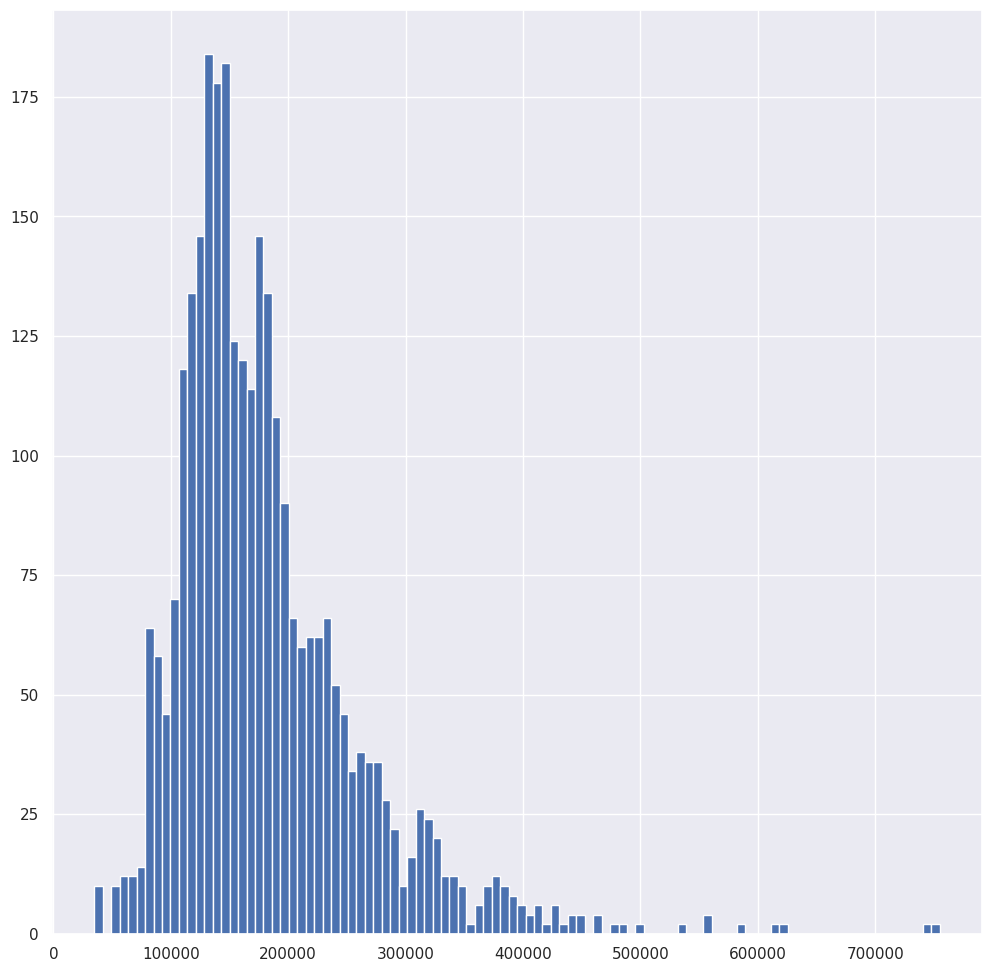

In [233]:
df["SalePrice"].hist(bins=100)
plt.show()

In [234]:
# SalePrice 'ın dağılımında sıkıntı var. Biz buna insiyatif alarak logaritmik dönüşüm yapabiliriz.

In [235]:
train_df[df["SalePrice"].notnull()]
test_df[df["SalePrice"].isnull()]

<ipython-input-235-fe532c30ac9a>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_df[df["SalePrice"].isnull()]


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SalePrice,NEW_1st*GrLiv,NEW_Garage*GrLiv,TotalQual,NEW_TotalFlrSF,NEW_TotalBsmtFin,NEW_PorchArea,NEW_TotalHouseArea,NEW_TotalSqFeet,NEW_LotRatio,NEW_RatioArea,NEW_GarageLotRatio,NEW_MasVnrRatio,NEW_DifArea,NEW_OverallGrade,NEW_Restoration,NEW_HouseAge,NEW_RestorationAge,NEW_GarageAge,NEW_GarageRestorationAge,NEW_GarageSold,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_Rare,LotShape_IR2,LotShape_Rare,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_Rare,Condition2_1,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Rare,RoofMatl_1,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Gd,ExterQual_Rare,ExterQual_TA,ExterCond_Gd,ExterCond_Rare,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Rare,Foundation_Slab,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No,BsmtCond_Rare,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_LwQ,BsmtFinType2_No,BsmtFinType2_Rare,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare,HeatingQC_TA,CentralAir_1,Electrical_FuseF,Electrical_Rare,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min2,Functional_Mod,Functional_Rare,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_No,GarageType_Rare,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf,GarageQual_No,GarageQual_Rare,GarageQual_TA,GarageCond_No,GarageCond_Rare,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_No,Fence_Rare,SaleType_New,SaleType_Rare,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,PoolArea_480,PoolArea_512,PoolArea_519,PoolArea_555,PoolArea_576,PoolArea_648,PoolArea_738,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010


In [236]:
y = np.log1p(train_df["SalePrice"])
X = train_df.drop(["Id", "SalePrice"], axis=1)

In [237]:
print(y)

0      12.248
1      12.109
2      12.317
3      11.849
4      12.429
5      11.871
6      12.635
7      12.206
8      11.775
9      11.678
10     11.771
11     12.751
12     11.878
13     12.541
14     11.964
15     11.791
16     11.912
17     11.408
18     11.977
19     11.842
20     12.693
21     11.845
22     12.346
23     11.775
24     11.945
25     12.454
26     11.812
27     12.631
28     12.243
29     11.135
30     10.597
31     11.914
32     12.100
33     12.017
34     12.534
35     12.641
36     11.884
37     11.938
38     11.599
39     11.314
40     11.983
41     12.044
42     11.878
43     11.777
44     11.857
45     12.676
46     12.387
47     12.428
48     11.635
49     11.752
50     12.084
51     11.648
52     11.608
53     12.861
54     11.775
55     12.103
56     12.058
57     12.188
58     12.992
59     11.735
60     11.970
61     11.523
62     12.219
63     11.849
64     12.299
65     12.667
66     12.101
67     12.328
68     11.290
69     12.324
70     12.405
71    

In [238]:
# Verinin eğitim ve test verisi olarak bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

In [239]:
lgbm = LGBMRegressor().fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7036
[LightGBM] [Info] Number of data points in the train set: 2336, number of used features: 193
[LightGBM] [Info] Start training from score 12.019251


In [240]:
# Yapılan LOG dönüşümünün tersinin (inverse'den) alınması
new_y = np.expm1(y_pred)
new_y_test = np.expm1(y_test)

In [241]:
# düzelttikten sonra bir daha hatamıza bakalım
np.sqrt(mean_squared_error(new_y_test, new_y))

27032.882086170324

In [242]:
# Metriklerimize baktığımızda modelin sonucu hiç fena değil. En iyisi CatBoost.
# Fakat insiyatif olarak CatBoost yerine LigthGBM kullanacağım.
# CatBoost daha doğru sonuç veriyor fakat çok fazla zamanımızı alıyor.
# Bu yüzden insiyatif alarak LigthGBM sonucunun da gayet yeterli olduğunu düşünürek LigthGBM modelini kuracağım

In [243]:
# Hiperparametre optimizasyonu

In [244]:
lgbm_model = LGBMRegressor(random_state=46)

In [245]:
lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': 46,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [246]:
rmse = np.mean(np.sqrt(-cross_val_score(lgbm_model, X, y, cv=5, scoring="neg_mean_squared_error")))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7052
[LightGBM] [Info] Number of data points in the train set: 2336, number of used features: 193
[LightGBM] [Info] Start training from score 12.022348
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7055
[LightGBM] [Info] Number of data points in the train set: 2336, number of used features: 192
[LightGBM] [Info] Start training from score 12.026846
[LightGBM] [Warning] Found

In [247]:
lgbm_params = {
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 150],  # Ağaç sayısını sınırlayın
    "colsample_bytree": [0.5, 0.7, 1],  # Rastgele sütun seçimini artırın

}

In [248]:
lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004532 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7036
[LightGBM] [Info] Number of data points in the train set: 2336, number of used features: 193
[LightGBM] [Info] Start training from score 12.019251


In [249]:
lgbm_best_grid.best_params_

{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'n_estimators': 150}

In [250]:
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_).fit(X,y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7114
[LightGBM] [Info] Number of data points in the train set: 2920, number of used features: 196
[LightGBM] [Info] Start training from score 12.024057


In [251]:
print(f"İlk RMSE: {rmse}")

İlk RMSE: 0.052672473275741705


In [252]:
rmse_new = np.mean(np.sqrt(-cross_val_score(lgbm_final, X, y, cv=5, scoring="neg_mean_squared_error")))
print(f"Yeni RMSE: {rmse_new}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7052
[LightGBM] [Info] Number of data points in the train set: 2336, number of used features: 193
[LightGBM] [Info] Start training from score 12.022348
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006940 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7055
[LightGBM] [Info] Number of data points in the train set: 2336, number of used features: 192
[LightGBM] [Info] Start training from score 12.026846
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM]

In [253]:
# Değişkenlerin önem düzeyini belirten feature_importance fonksiyonu

In [254]:
def plot_importance(model, features, num=len(X), save=False):  # num arümanının ön tanımlı değeri verisetindeki değişken sayısı kadar
  feature_imp = pd.DataFrame({"Value": model.feature_importances_,"Feature": features.columns})
  plt.figure(figsize=(10, 10))
  sns.set(font_scale=1)
  sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                   ascending=False)[0:num])
  plt.title("Features")
  plt.tight_layout()
  plt.show()
  if save:
    plt.savefig("importances.png")
    # Save True ise ilgili görseli kaydeder ihtiyacımız olduğunda kullanabiliriz

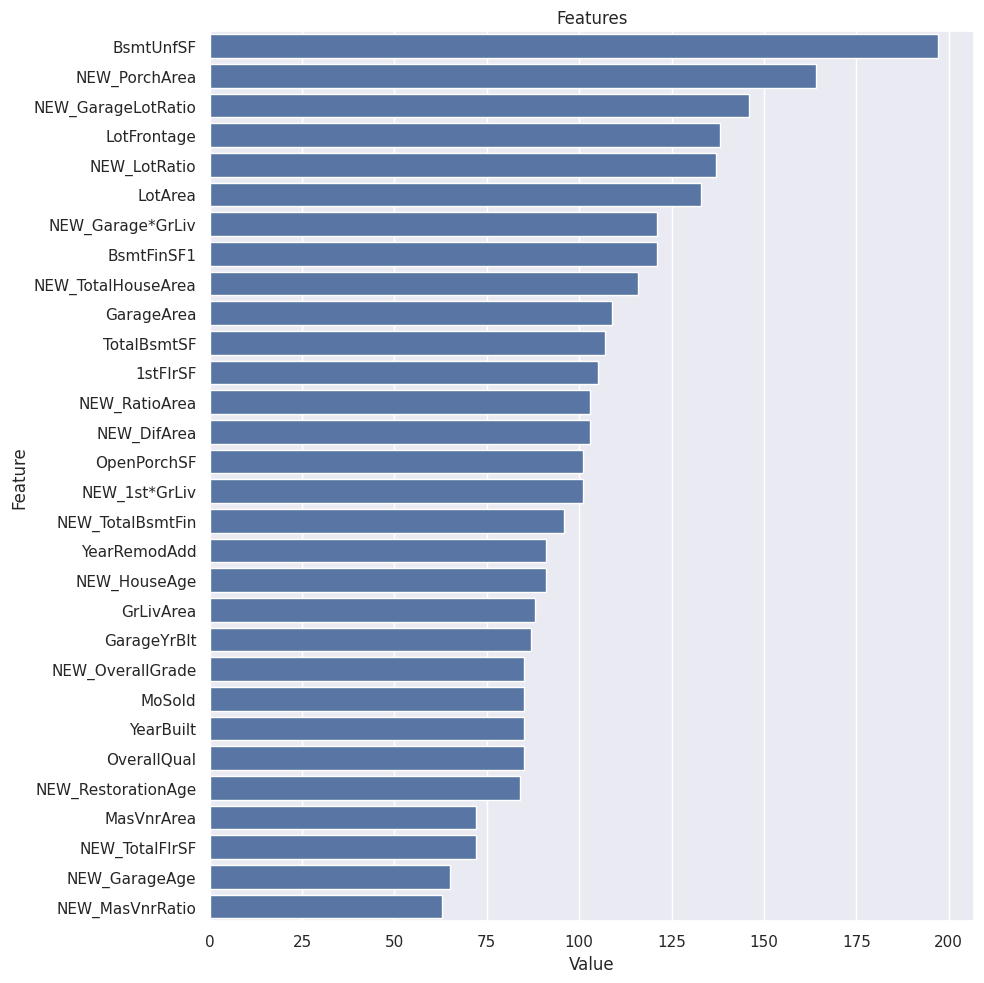

In [255]:
plot_importance(lgbm_final, X, num=30)